# Lead Scoring Case Study

## Problem Statement

X Education is an online education company that sells courses to industry professionals. The company gets leads from its website, search engines, and past referrals. The typical lead conversion rate at X Education is around 30%. The CEO wants to improve the lead conversion rate to 80%.

You have been appointed to help X Education identify the most potential leads, also known as "hot leads." You will build a model to assign a lead score to each lead, such that the customers with a higher lead score have a higher conversion chance.

The goal of this project is to help X Education improve its lead conversion rate and increase sales. By identifying the most potential leads, the sales team can focus their efforts on communicating with the leads that are most likely to convert. This will lead to a more efficient and effective sales process.

## Reading and Understanding the Data

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Supressing warnings.

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset.

leads = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', 100)

In [3]:
# Checking the first 5 rows of the dataset.

leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

#### Inspecting the various aspects of the  dataframe

In [4]:
## Checking the shape of the dataframe.

leads.shape

(9240, 37)

Dataframe contains 9240 rows and 37 columns.

In [5]:
## Checking the statistical summary of all the numerical columns.

leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
## Checking the data types of columns and the number of non-null values.

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are null values in some columns. Also, there are a few columns with categorical varialbes.

In [7]:
## Checking the count of null values in each columns.

leads.isnull().sum().sort_values(ascending = False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

There are a few columns with high number of null or missing values.

In [8]:
## Checking if there are any duplicate rows present in the dataframe.

leads.duplicated().sum()

0

There are no duplicate rows present in the dataframe.

# Data Cleaning

#### 'Select' values

It is mentioned in the problem statement that "Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value". The reason might be the customer did not select any options from the drop down menu and hence the default value 'Select' has been added to the dataset. Since these variables do not provive any useful information, they can ben replaced with NaN values.

In [9]:
## Checking columns with 'Select' variable.

cols_select = leads.isin(["Select"]).any()
cols_select.sort_values(ascending = False)

Lead Profile                                      True
How did you hear about X Education                True
Specialization                                    True
City                                              True
Get updates on DM Content                        False
Through Recommendations                          False
Receive More Updates About Our Courses           False
Tags                                             False
Lead Quality                                     False
Update me on Supply Chain Content                False
Prospect ID                                      False
Newspaper                                        False
Asymmetrique Activity Index                      False
Asymmetrique Profile Index                       False
Asymmetrique Activity Score                      False
Asymmetrique Profile Score                       False
I agree to pay the amount through cheque         False
A free copy of Mastering The Interview           False
Digital Ad

In [10]:
## Replacing all the "Select" values to "NaN".

leads = leads.replace('Select', np.nan)

In [11]:
## Checking columns with 'Select' variable again.

cols_select = leads.isin(["Select"]).any()
cols_select.sort_values(ascending = False)

Prospect ID                                      False
X Education Forums                               False
Digital Advertisement                            False
Through Recommendations                          False
Receive More Updates About Our Courses           False
Tags                                             False
Lead Quality                                     False
Update me on Supply Chain Content                False
Get updates on DM Content                        False
Lead Profile                                     False
City                                             False
Asymmetrique Activity Index                      False
Asymmetrique Profile Index                       False
Asymmetrique Activity Score                      False
Asymmetrique Profile Score                       False
I agree to pay the amount through cheque         False
A free copy of Mastering The Interview           False
Newspaper                                        False
Newspaper 

All the 'Select' variables have been removed from the dataframe. 

#### Handling Missing Values

In [12]:
# Checking the percentage of missing values in each columns.

round((leads.isna().mean())*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [13]:
## Dropping all columns with a missing value percentage of greater than 40.

leads = leads.drop(leads.loc[:, list((round(leads.isnull().mean() * 100, 2) >= 40))].columns, 1)

In [14]:
# Checking the percentage of missing values in remaining columns.

round((leads.isna().mean())*100,2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [15]:
## Checking the unique value counts for all columns of the dataframe.

for column in leads.columns:
    print(column +' -',len(leads[column].value_counts()))

Prospect ID - 9240
Lead Number - 9240
Lead Origin - 5
Lead Source - 21
Do Not Email - 2
Do Not Call - 2
Converted - 2
TotalVisits - 41
Total Time Spent on Website - 1731
Page Views Per Visit - 114
Last Activity - 17
Country - 38
Specialization - 18
What is your current occupation - 6
What matters most to you in choosing a course - 3
Search - 2
Magazine - 1
Newspaper Article - 2
X Education Forums - 2
Newspaper - 2
Digital Advertisement - 2
Through Recommendations - 2
Receive More Updates About Our Courses - 1
Tags - 26
Update me on Supply Chain Content - 1
Get updates on DM Content - 1
City - 6
I agree to pay the amount through cheque - 1
A free copy of Mastering The Interview - 2
Last Notable Activity - 16


* Columns - 'Prospect ID' and 'Lead Number' have unique values in each rows. - These columns can be removed.
* Columns - 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content' and 'I agree to pay the amount through cheque' have the same value throughout all the rows. - These columns can also be removed.

In [16]:
## Dropping columns 'Prospect ID' and 'Lead Number'.

leads = leads.drop('Prospect ID', axis = 1)
leads = leads.drop('Lead Number', axis = 1)

## Dropping the 5 columns which do not change their values through out the entire rows; they don't add any useful information.

leads = leads.drop('Magazine', axis = 1)
leads = leads.drop('Receive More Updates About Our Courses', axis = 1)
leads = leads.drop('Update me on Supply Chain Content', axis = 1)
leads = leads.drop('Get updates on DM Content', axis = 1)
leads = leads.drop('I agree to pay the amount through cheque', axis = 1)

In [17]:
# Checking the percentage of missing values in remaining columns.

round((leads.isna().mean())*100,2).sort_values(ascending = False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time

* It can be seen that except the columns - 'TotalVisits' and 'Page Views Per Visit', all other columns with missing values have categorical variables. 
* It would be a good idea to check the value counts of each of these categorical columns with missing values, so that it would be easier to decide how to impute the missing values in each of these columns. 

In [18]:
## Creating a list of all the categorical columns with missing values.

categorical_cols = ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for column in categorical_cols:
        value = round(100*leads[column].value_counts(normalize = True),2)
        print("value_counts for  - ",column,"\n")
        print(value,"\n")
        print("___"*20,"\n")

value_counts for  -  City 

Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64 

____________________________________________________________ 

value_counts for  -  Specialization 

Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management 

* **City** - Missing values - 39.71%.  Mumbai has the highest number of leads - 57.84%. Imputing missing values with Mumbai will make the data skewed and will cause bias in the model that to be created. Hence column "City" can be dropped.
* **Specialization** - Missing values - 36.58%. It seems like the categories are evenly distributed. Hence creating a new category would be a better idea than imputing the missing values or dropping the column.
* **Tags** - Missing values - 36.29%. It indicates the current status of the communication with the lead. This column does not seem like it will be of good use to create a model. Hence this column can be dropped. 
* **What matters most to you in choosing a course** - Missing values - 29.32%. 'Better Career Prospects' is selected by 99.95% of the leads. It is evident that the data is massively skewed hence this column can be dropped.
* **What is your current occupation** - Missing values - 29.11%.       85.5% of the leads are 'Unemployed'. Even though the data is skewed, it is not at all a good idea to drop the column as it seems like an important variable from the business perspective. It can be assumed that unemployed people will be enrolled in a course to increase their chances of getting employed. We can impute the missing values with 'Unemployed' as it has the most number of values.
* **Country** - Missing values - 26.63%. 95.77% of the leads are from India. The data is skewed and this column can be dropped as it will not provide any useful insights even if we impute the missing values with 'India'.
* **Last Activity** - Missing values - 1.11%. 'Email Opened' has the highest number of values - 37.62%. Hence we can impute the missing values with 'Email Opened'.
* **Lead Source** - Missing values - 0.39%. 'Google' has the most number of values - 31.16%. Hence we can impute the missing values with 'Google'.

In [19]:
## Dropping columns - 'City','Tags','What matters most to you in choosing a course' and 'Country'.

leads.drop(['City', 'Tags','What matters most to you in choosing a course','Country'], axis = 1, inplace = True)
leads.shape

(9240, 19)

In [20]:
## Imputing missing values in columns - 'Specialization','What is your current occupation','Last Activity' and 'Lead Source'.

imputing_values = {'Specialization':'Others', 'What is your current occupation':'Unemployed',
                'Last Activity':'Email Opened', 'Lead Source':'Google'}
leads = leads.fillna(value = imputing_values)

In [21]:
# Checking the percentage of missing values in remaining columns.

round((leads.isna().mean()) * 100,2).sort_values(ascending = False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Search                                    0.00
A free copy of Mastering The Interview    0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
Specialization                            0.00
What is your current occupation           0.00
Lead Source                               0.00
Last Activity                             0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Last Notable Activity                     0.00
dtype: float64

'TotalVisits' and 'Page Views Per Visit' are the 2 columns with missing values. Both the columns have numeric values.

In [22]:
## Checking value counts of 'TotalVisits' column.

leads.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

Missing values in 'TotalVisits' column can be imputed with mode.

In [23]:
## Imputing missing values in 'TotalVisits' column with mode.

leads.TotalVisits.fillna(leads.TotalVisits.mode()[0], inplace = True)

In [24]:
## Checking value counts of 'Page Views Per Visit' column.

leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

Missing values in 'Page Views Per Visit' column can be imputed with mode.

In [25]:
## Imputing missing values in 'Page Views Per Visit' column with mode.

leads["Page Views Per Visit"].fillna(leads["Page Views Per Visit"].mode()[0], inplace = True)

In [26]:
# Checking the percentage of missing values again.

round((leads.isna().mean()) * 100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [27]:
## Checking the remaining columns.

leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [28]:
## Checking value counts of 'Last Notable Activity' column.

leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

It seems like column 'Last Notable Activity' does not provide any valuable information. Hence the column can be dropped.

In [29]:
## Dropping column 'Last Notable Activity'.

leads = leads.drop('Last Notable Activity', axis = 1)

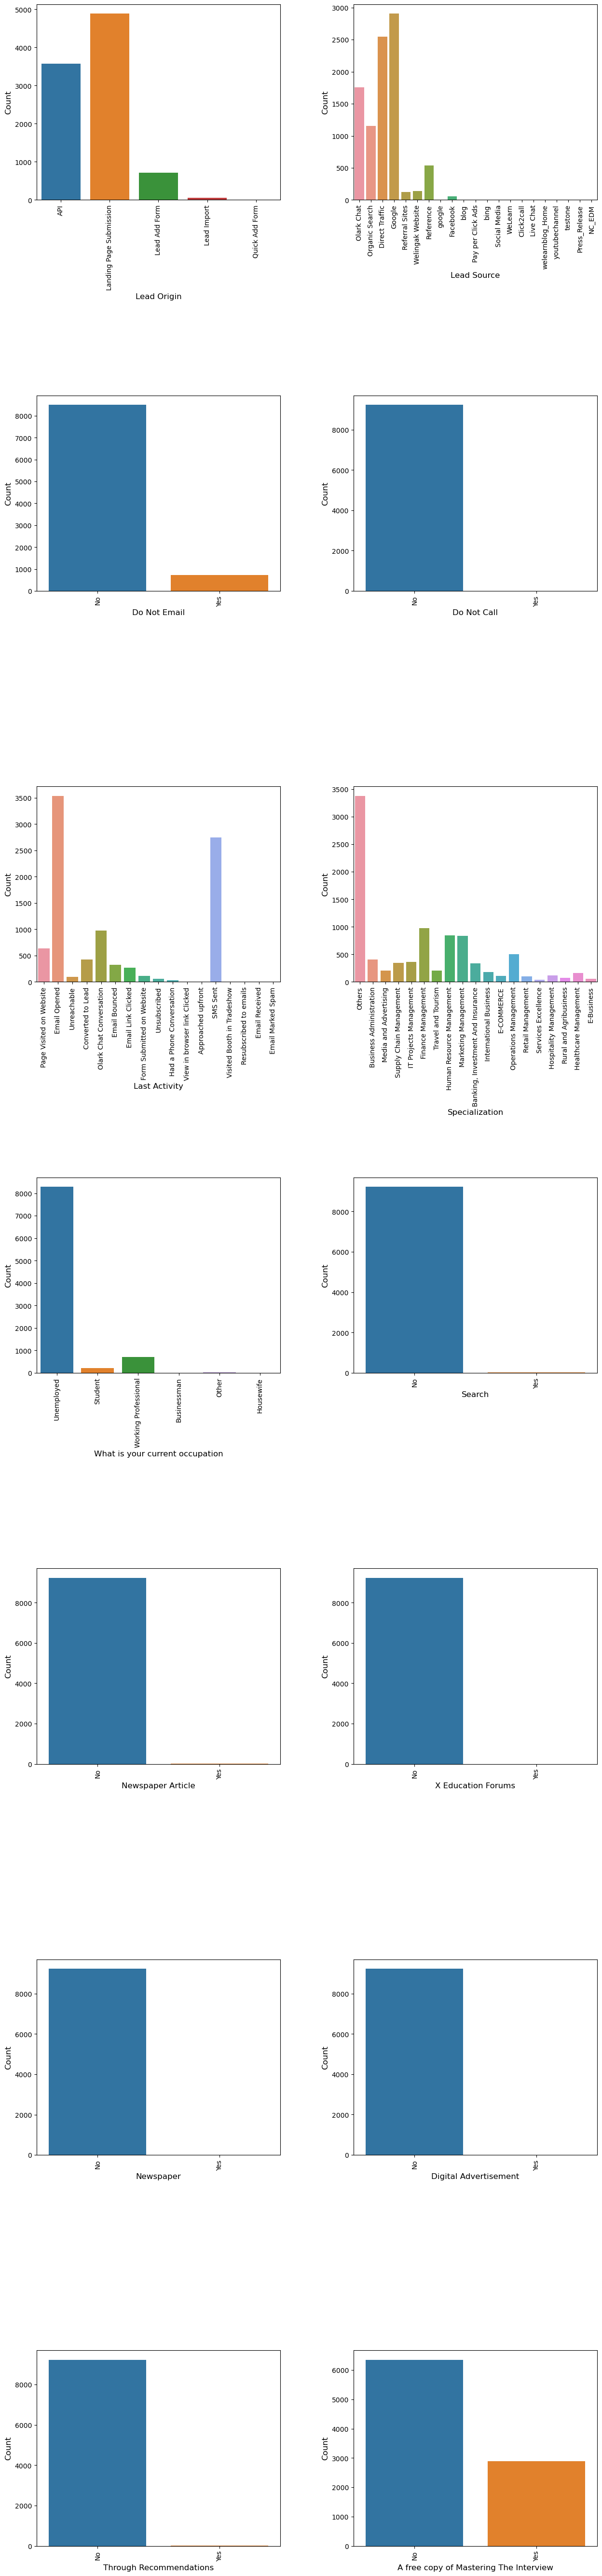

In [30]:
## Checking data distribution for all the categorical columns by plotting count plots.

plt.figure(figsize = (15, 100))
plt.subplots_adjust(wspace = .3, hspace = 1)
cols_categorical = leads.select_dtypes(include = ['category', 'object']).columns.tolist()


for i, column in enumerate(cols_categorical):
    plt.subplot(10, 2, i+1)
    ax = sns.countplot(x = column, data = leads, orient ='v')
    plt.xticks(rotation = 90, fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel(column, fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    

plt.show()

From the above count plots, it is evident that the following columns have highly skewed data:
* Do Not Call
* Search
* Newspaper Article
* X Education Forums
* Newspaper
* Digital Advertisement
* Through Recommendations

Thesse variables will affect the performance of the model as they can lead to biased estimates. Hence these columns can be removed. 

In [31]:
## Dropping categorical columns with highly skewed data.

leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations'],axis=1,inplace=True)

In [32]:
## Checking the shape of the updated dataframe.

leads.shape

(9240, 11)

The updated dataframe contains 9240 rows and 11 columns.

#### Outlier Analysis

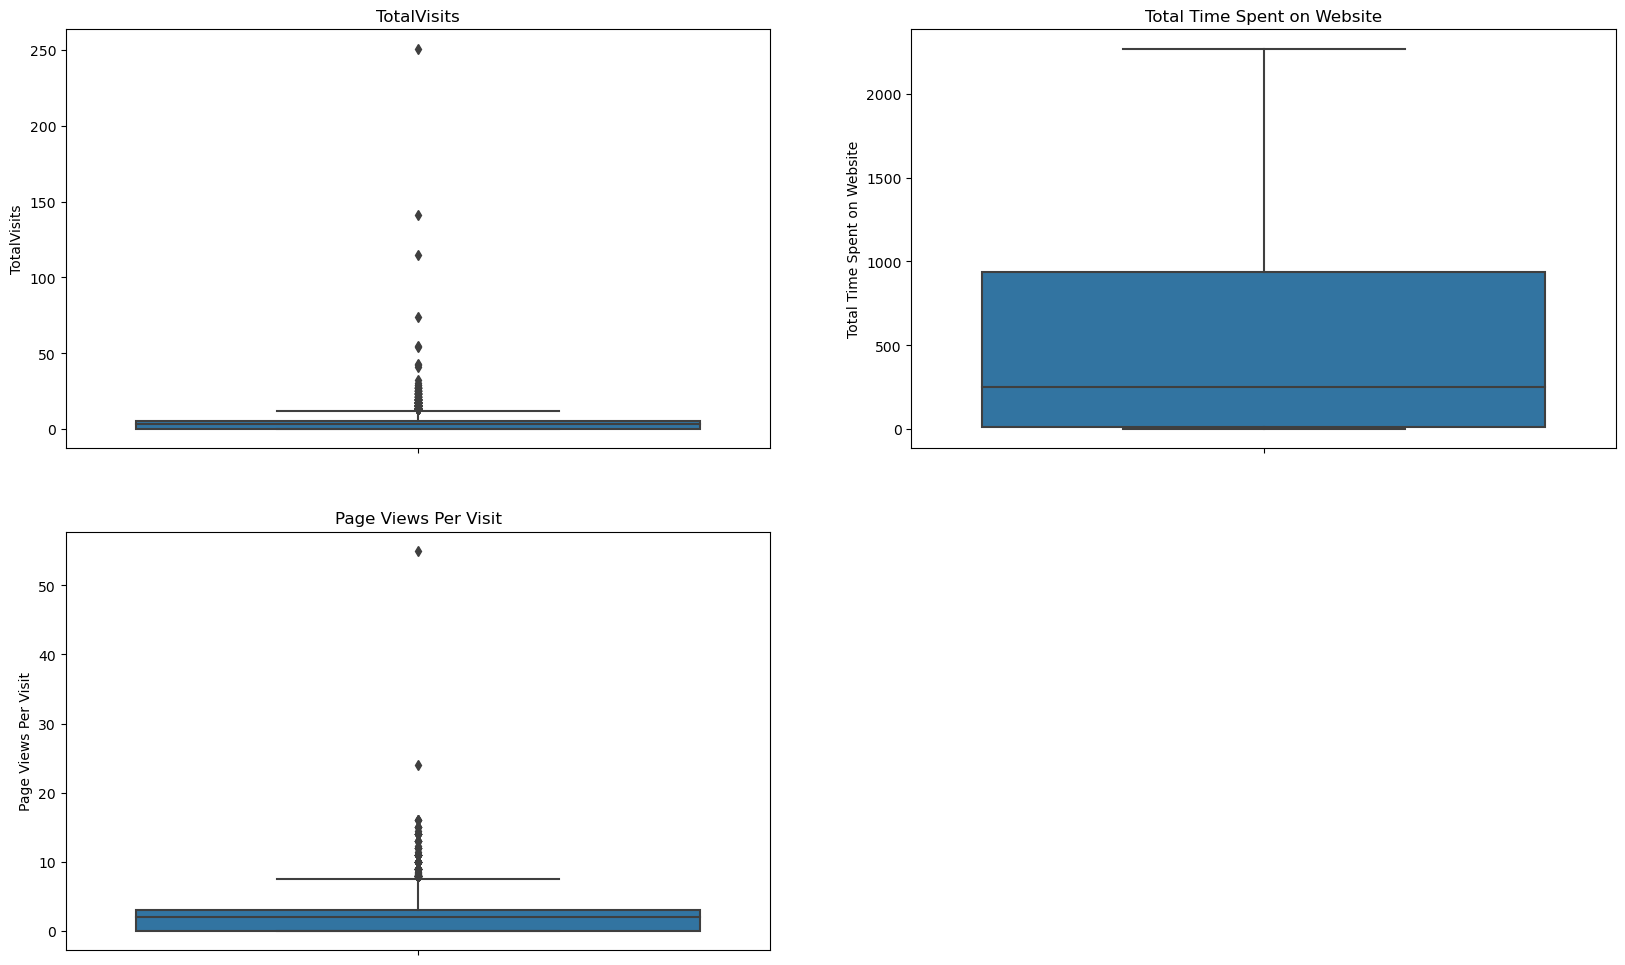

In [33]:
## Plotting box plots and checking for outliers on numerical variables other than the target variable.

columns_num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize = (20, 25))
for col in enumerate(columns_num):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(y=col[1], data = leads)

plt.show()

Columns - 'TotalVisits' and 'Page Views Per Visit' have outliers. These outliers can be treated by capping and flooring before making the model.

In [34]:
## Treating outliers by capping and flooring method.

cols_outliers = ['TotalVisits','Page Views Per Visit']

for i in cols_outliers:
        q1 = leads[i].describe()["25%"]
        q3 = leads[i].describe()["75%"]
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        
        
        leads[i] = np.where(leads[i] > upper_bound, upper_bound,leads[i])  # Capping upper bound
        
        leads[i] = np.where(leads[i] < lower_bound, lower_bound,leads[i])  # Flooring lower bound 

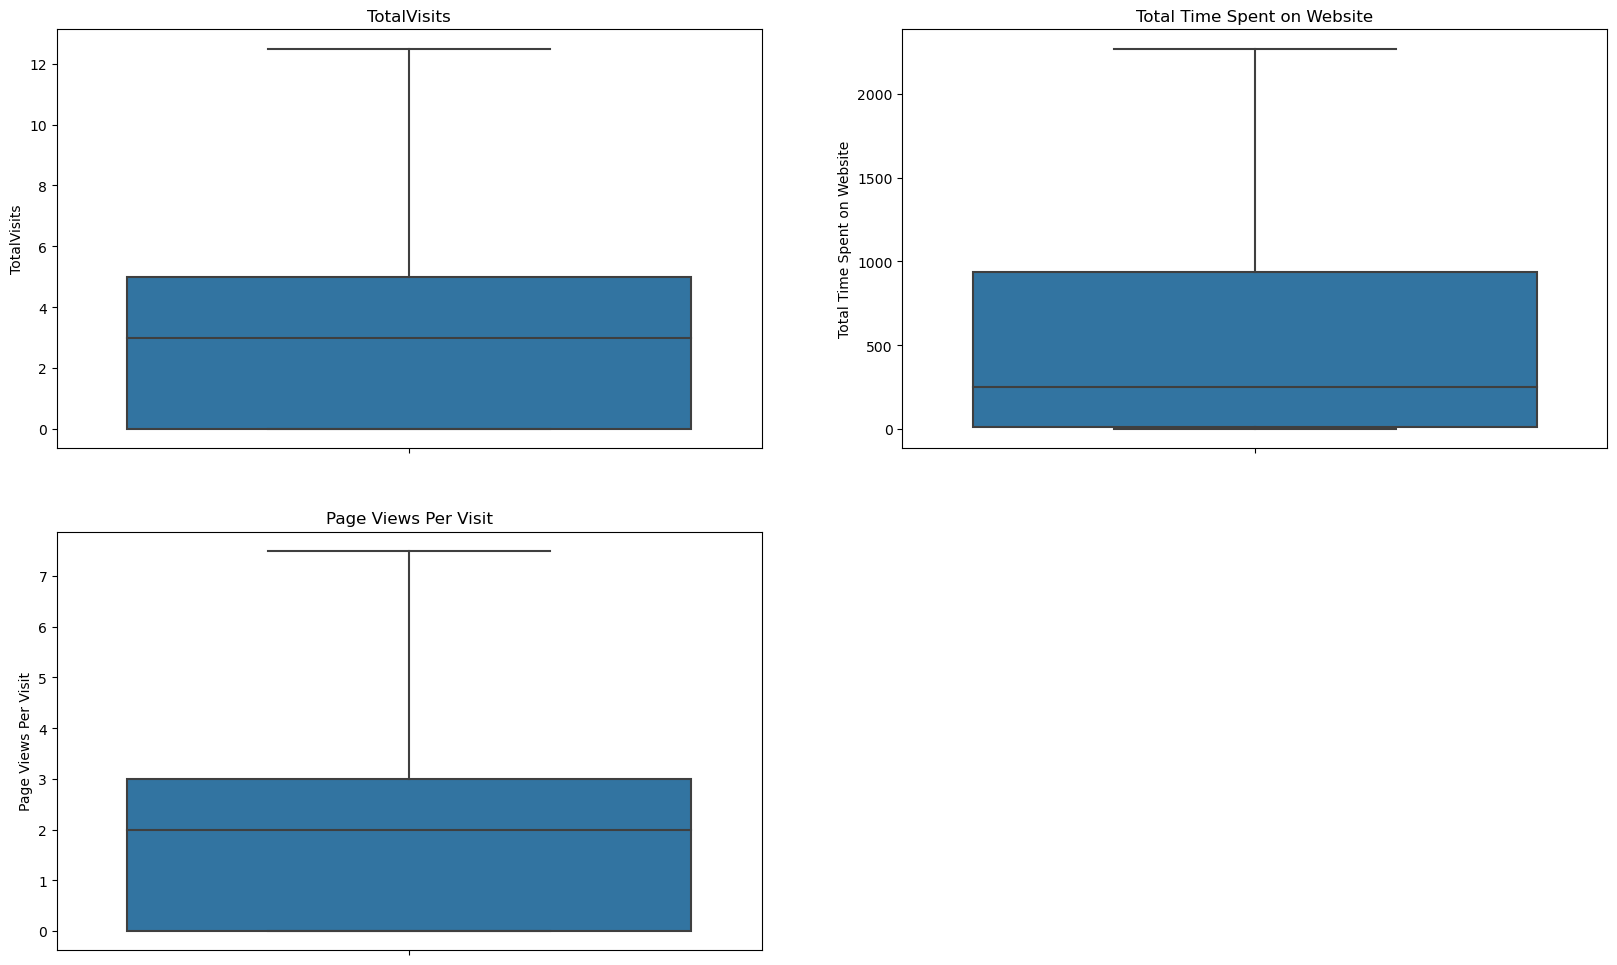

In [35]:
## Checking for outliers by plotting box plots after outlier treatment.

columns_num = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize = (20, 25))
for col in enumerate(columns_num):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.boxplot(y=col[1], data = leads)

plt.show()

It is evident that there are no outliers present in the data now.

#### Data Standardization

In [36]:
## Checking value counts of all the categorical columns.

columns_categorical = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for column in columns_categorical:
        value = round(100*leads[column].value_counts(normalize = True),2)
        print("value_counts for  - ",column,"\n")
        print(value,"\n")
        print("___"*20,"\n")

value_counts for  -  Lead Origin 

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64 

____________________________________________________________ 

value_counts for  -  Lead Source 

Google               31.43
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64 

____________________________________________________________ 



* In column 'Lead Source', there are 2 values named 'Google' and 'google'. As they both appear the same, we can go ahead and standardize the case.
* In columns "Lead Source" and "Last Activity", there are some categories with only a few records. It will be a good idea to group all these categories under a new category label to prevent ending up with a lot of unwanted categories.
* 'Do Not Email' and 'A free copy of Mastering The Interview' columns have binary categorical variables.We can map 'Yes' and 'No' values to 1 and 0 respectively for numeric representation and to include them in the model.
* Some column names are too lenghty - 'Total Time Spent on Website', 'What is your current occupation' and 'A free copy of Mastering The Interview'. We can convert them to smaller names to improve code readability and maintainability.

In [37]:
## Changing 'google' to 'Google' in column 'Lead Source'.

leads['Lead Source'] = leads['Lead Source'].replace("google","Google")

In [38]:
## Grouping low frequency categories in "Lead Source" and "Last Activity" columns to a new label "Others".

leads['Lead Source'] = leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")


leads['Last Activity'] = leads['Last Activity'].replace(['Form Submitted on Website','Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [39]:
## Checking value counts after replacing low frequency categories - 'Lead Source' column.

leads['Lead Source'].value_counts(normalize = True) * 100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [40]:
## Checking value counts after replacing low frequency categories - 'Last Activity' column.

leads['Last Activity'].value_counts(normalize = True) * 100

Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Email Bounced               3.528139
Others                      3.474026
Email Link Clicked          2.889610
Name: Last Activity, dtype: float64

In [41]:
## Mapping binary categorical variables Yes/No to 1/0 in 'Do Not Email' and 'A free copy of Mastering The Interview' columns. 

leads['Do Not Email'] = leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [42]:
## Renaming column names for better readability and maintainability.


## Renaming from "Total Time Spent on Website" to "Time Spent".

leads.rename(columns = {'Total Time Spent on Website': 'Time Spent'}, inplace = True)


## Renaming from "What is your current occupation" to "Occupation".

leads.rename(columns = {'What is your current occupation': 'Occupation'}, inplace = True)


## Renaming from "A free copy of Mastering The Interview" to "Free Copy".

leads.rename(columns = {'A free copy of Mastering The Interview': 'Free Copy'}, inplace = True)

In [43]:
## Checking info of the final dataset.

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead Origin           9240 non-null   object 
 1   Lead Source           9240 non-null   object 
 2   Do Not Email          9240 non-null   int64  
 3   Converted             9240 non-null   int64  
 4   TotalVisits           9240 non-null   float64
 5   Time Spent            9240 non-null   int64  
 6   Page Views Per Visit  9240 non-null   float64
 7   Last Activity         9240 non-null   object 
 8   Specialization        9240 non-null   object 
 9   Occupation            9240 non-null   object 
 10  Free Copy             9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


The final dataset after data cleaning seems suitable for model building; there is no need of any more cleaning/ modifications.

## Exploratory Data Analysis

#### Checking Lead Conversion Rate for Target variable - 'Converted'.

In [44]:
## Checking value counts.

round(leads['Converted'].value_counts(normalize = True) * 100,2).sort_values()

1    38.54
0    61.46
Name: Converted, dtype: float64

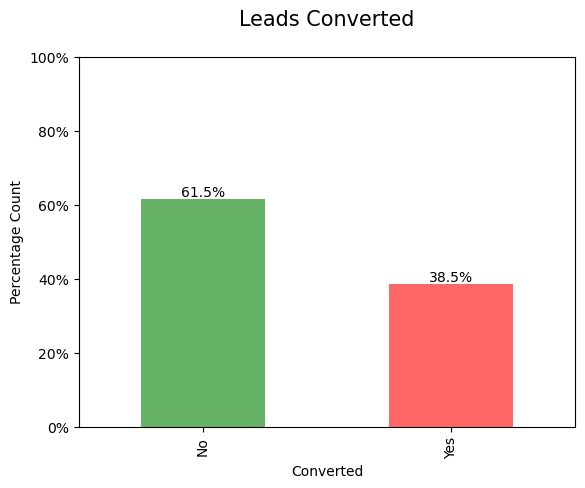

In [45]:
## Plotting a bar plot to visualise the Lead Conversion Rate.

ax = (100 * leads["Converted"].value_counts(normalize = True)).plot.bar(color = ["Green","Red"],alpha = 0.6)

plt.title("Leads Converted\n", fontdict={'fontsize': 15, 'fontweight' : 10})
plt.xlabel('Converted')
plt.ylabel("Percentage Count")

ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)
plt.xticks([0,1],["No","Yes"])

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

Lead Conversion Rate (LCR) is 38.54%

#### Univariate Analysis of Categorical Variables

In [46]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead Origin           9240 non-null   object 
 1   Lead Source           9240 non-null   object 
 2   Do Not Email          9240 non-null   int64  
 3   Converted             9240 non-null   int64  
 4   TotalVisits           9240 non-null   float64
 5   Time Spent            9240 non-null   int64  
 6   Page Views Per Visit  9240 non-null   float64
 7   Last Activity         9240 non-null   object 
 8   Specialization        9240 non-null   object 
 9   Occupation            9240 non-null   object 
 10  Free Copy             9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


In [47]:
## Creating a list of categorical variables columns.

categorical_cols = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                    "Occupation","Free Copy"]

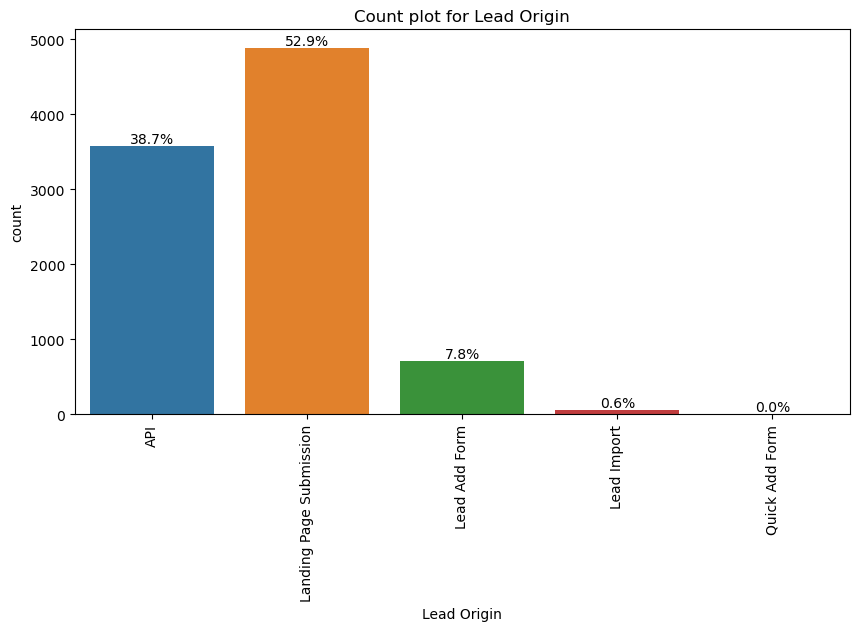

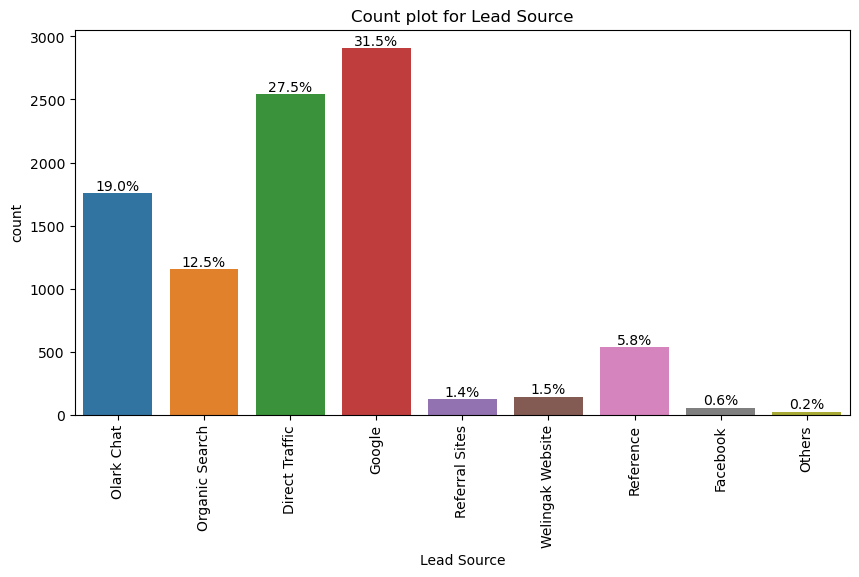

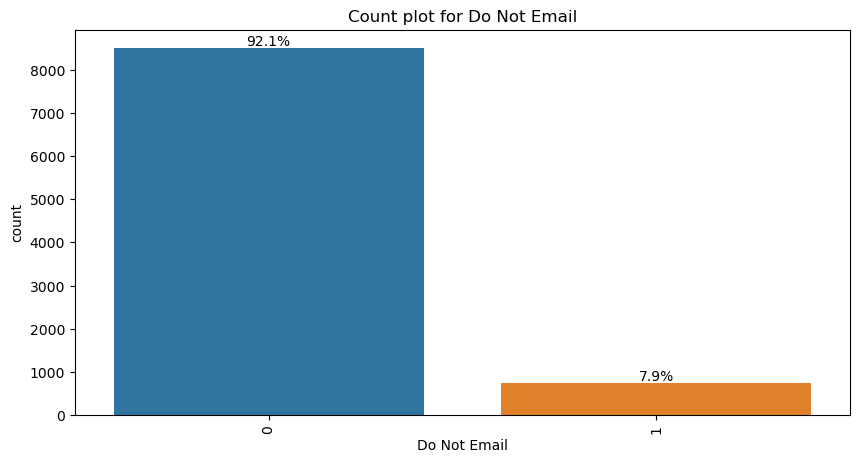

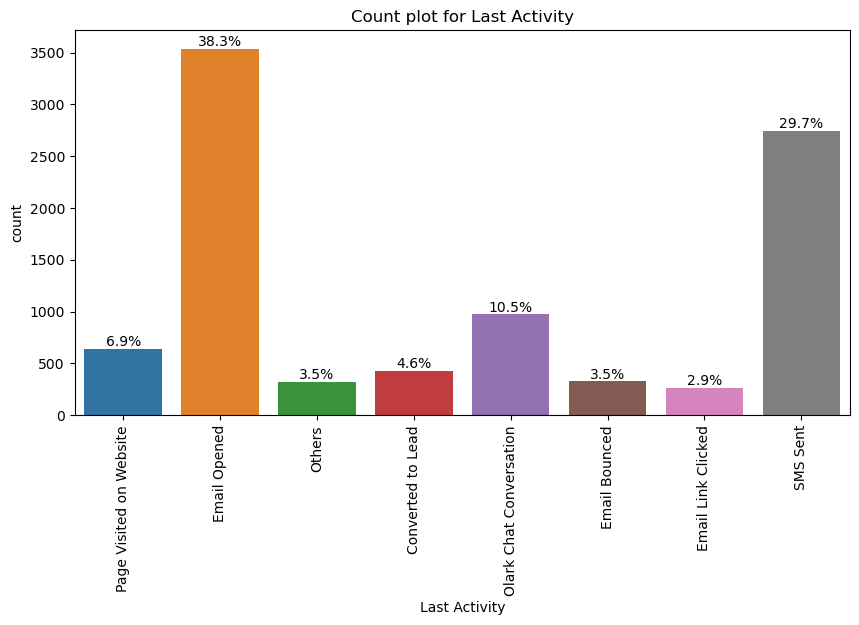

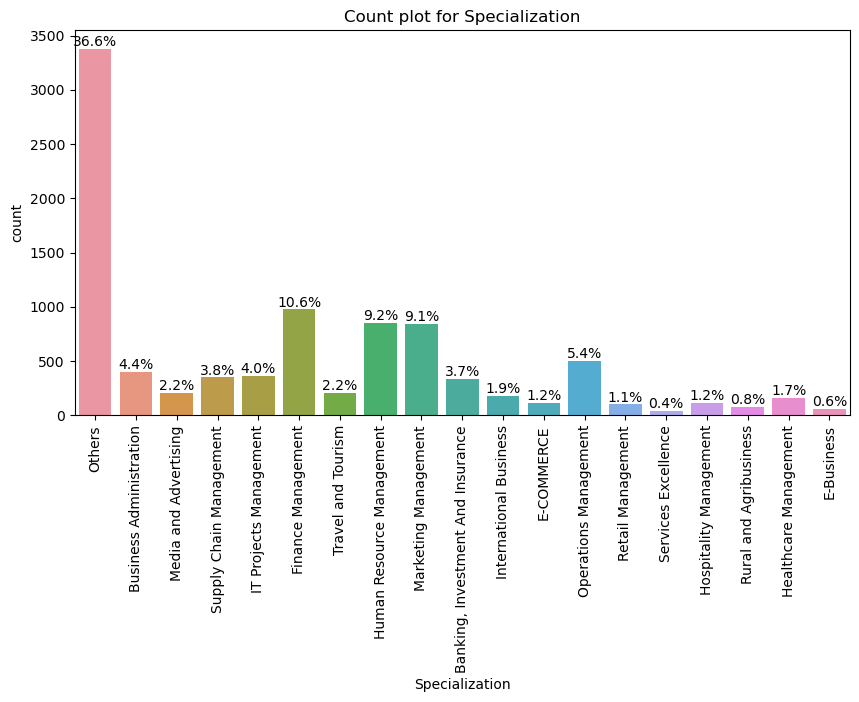

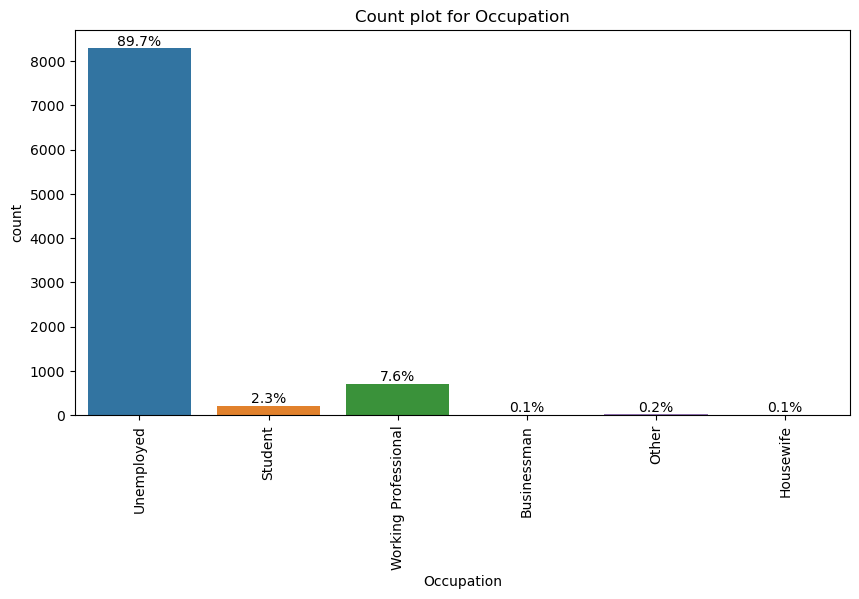

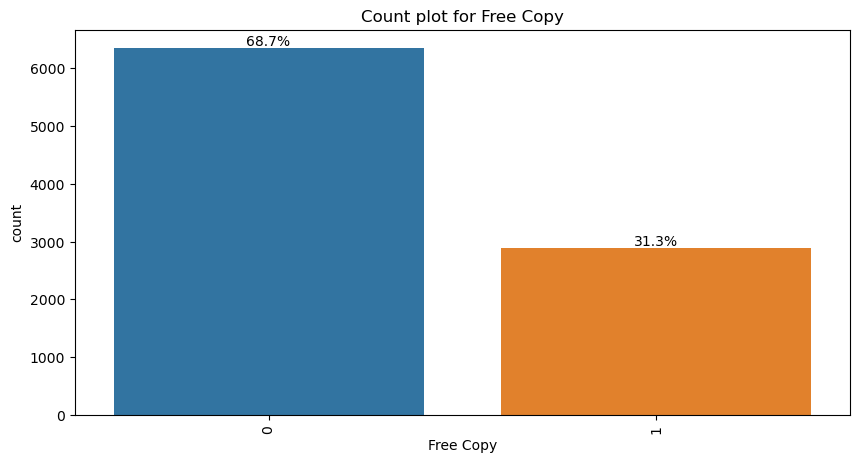

In [48]:
## Plotting count plots for all the variables.

for i in categorical_cols:
    
    plt.figure(figsize = [10,5])
    plt.title("Count plot for {}".format(i))
    ax = sns.countplot(x = i,data = leads)
    total = len(leads[i])
    plt.xticks(rotation = 90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

* **Lead Origin** - 52.9% of the customers were identified to be a lead through 'Landing Page Submission', followed by 'API' with 38.7%.
* **Lead Source** - 'Google' leads among the lead sources with 31.5% of customers, closely followed by 'Direct Traffic'(27.5%) and 'Olark Chat'(19%).
* **Do Not Email** - 7.9% of the customers opted out from Email; They do not want to get notified about the course through email.
* **Last Activity** - 'Email Opened' leads the list with 38.3% followed by 'SMS Sent'(29.7%).
* **Specialization** - Majority of the customers belong to 'Others' category(36.6%), followed by 'Finance Management'(10.6%), 'Human Resource Management'(9.2%) and 'Marketing Management'(9.1%). 
* **Occupation** - 89.7% of the customers are 'Unemployed', while 7.6% are 'Working Professional' and 2.3% are 'Student'.
* **Free Copy** - 68.7% of customers have opted out from receiving a free copy of 'Mastering The Interview'.

#### Bivariate Analysis of Categorical Variables

In [49]:
## Creating a function to do Bivariate Analysis.

def Bivar_Analysis(df , var, Target="Converted"):
    plt.figure(figsize=(18,5))
    plt.suptitle(f"Lead Conversion Rate of {var}", fontsize = 16)
    
    ax = sns.countplot(x = var, hue = Target, data = df)
    
    plt.xticks(rotation = 90)
    plt.ylabel("Count")
    plt.xlabel(f"{var}")
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=10, ha='center', va='bottom')

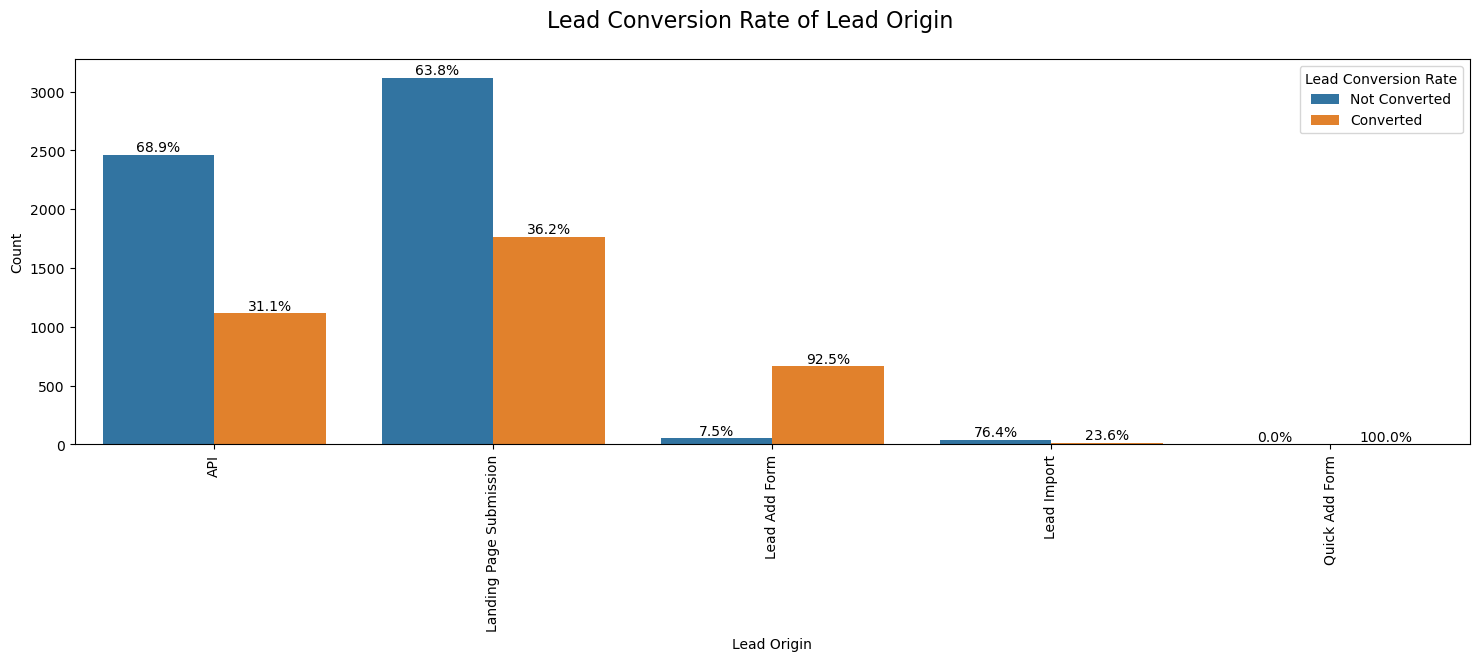

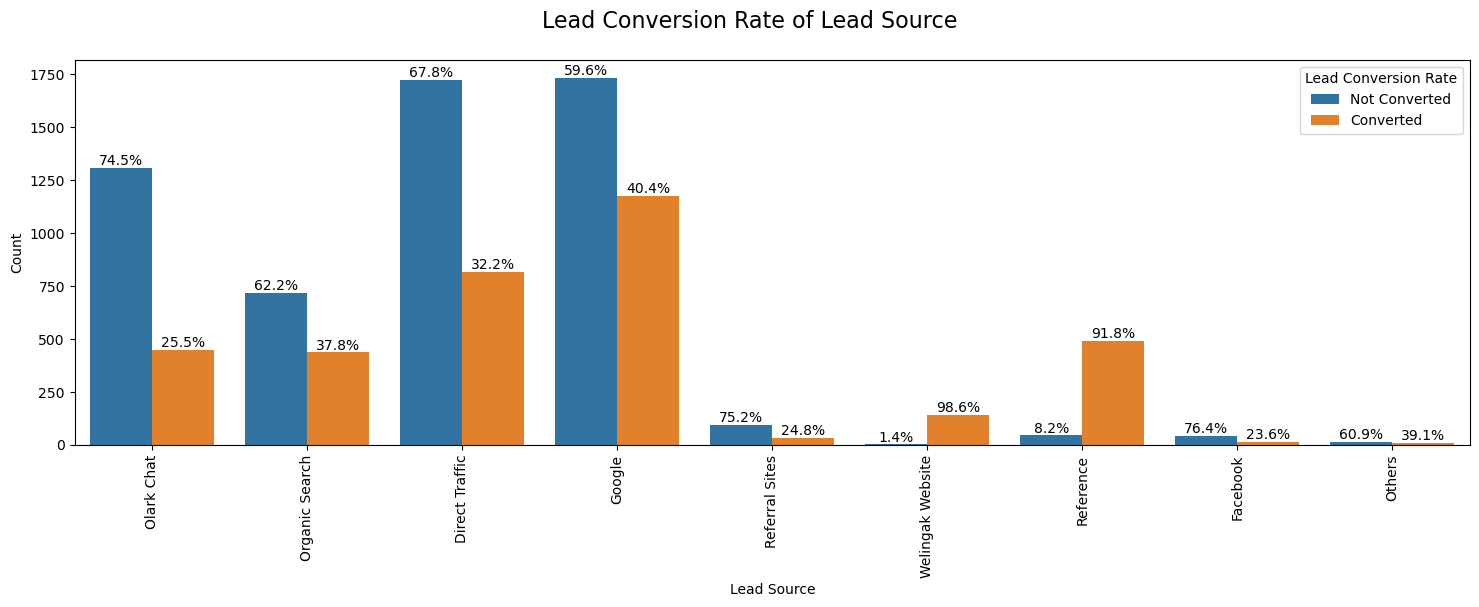

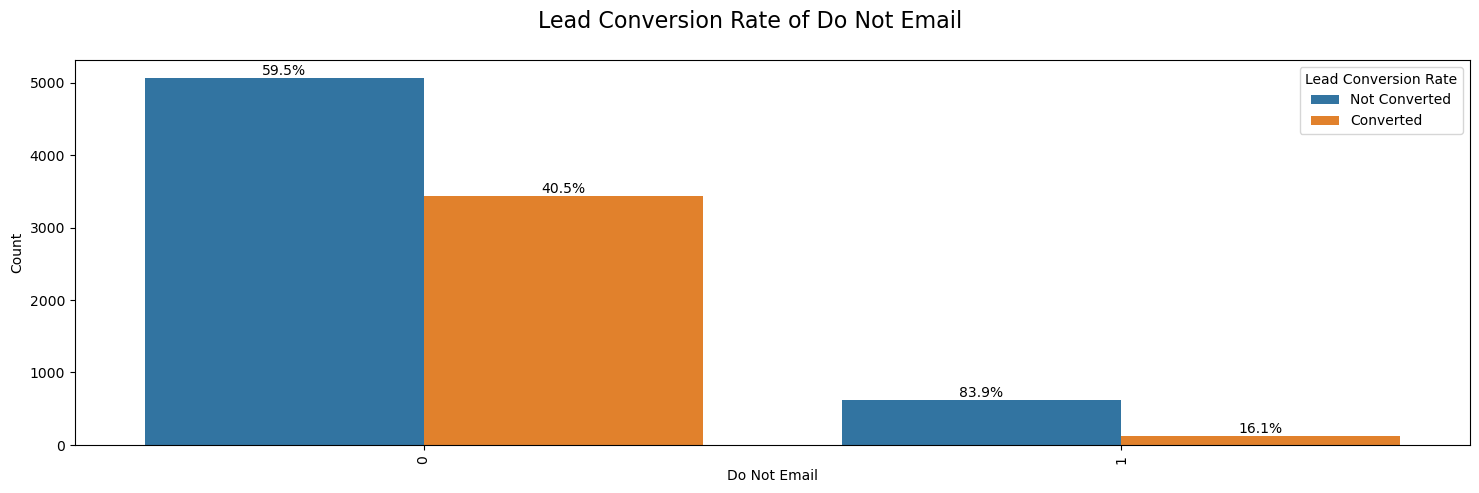

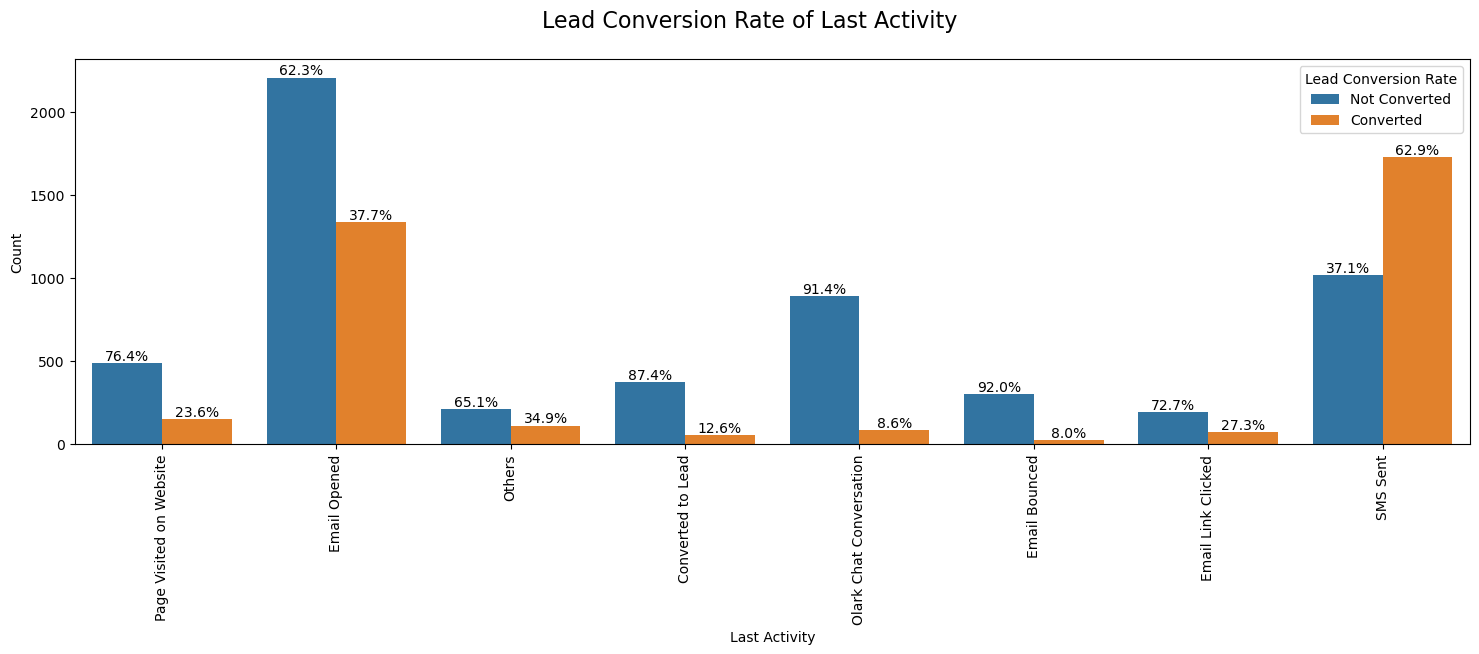

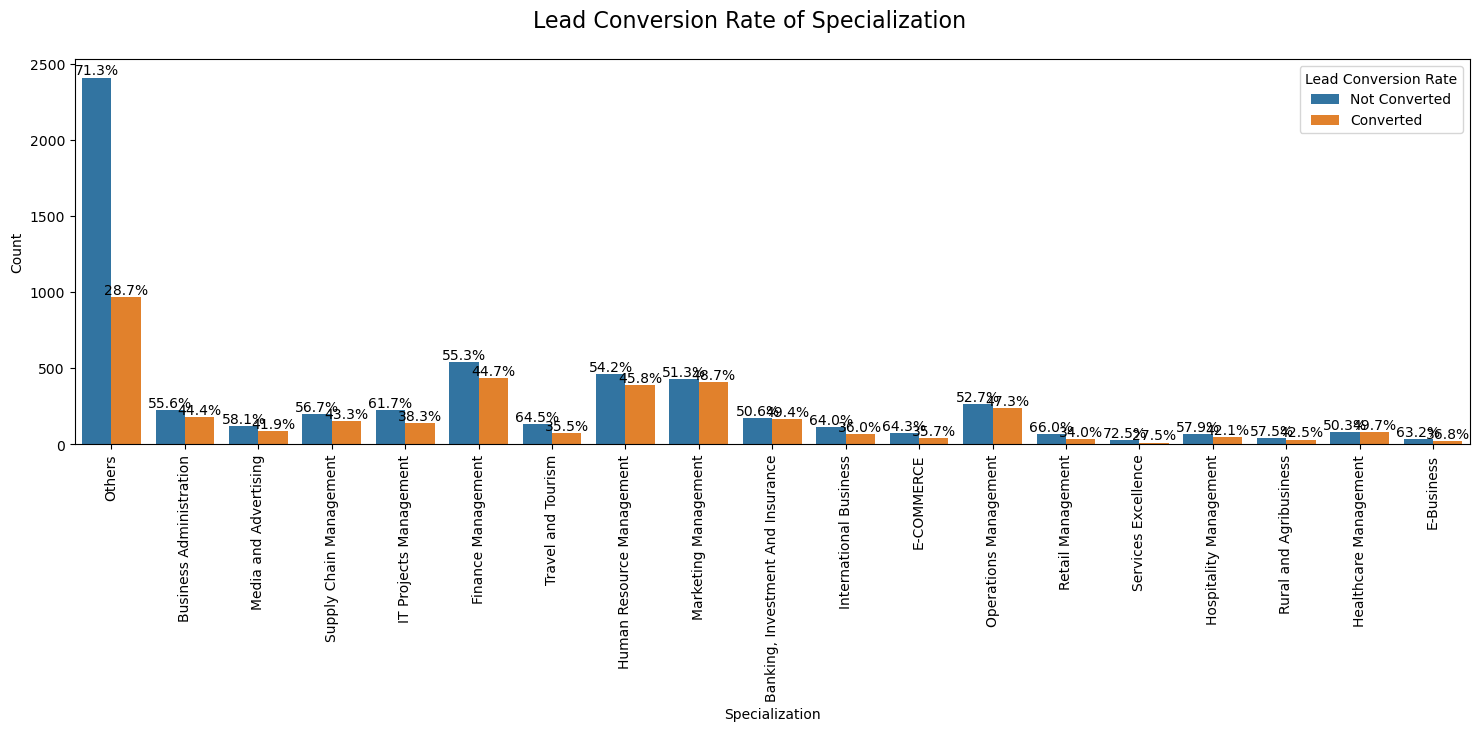

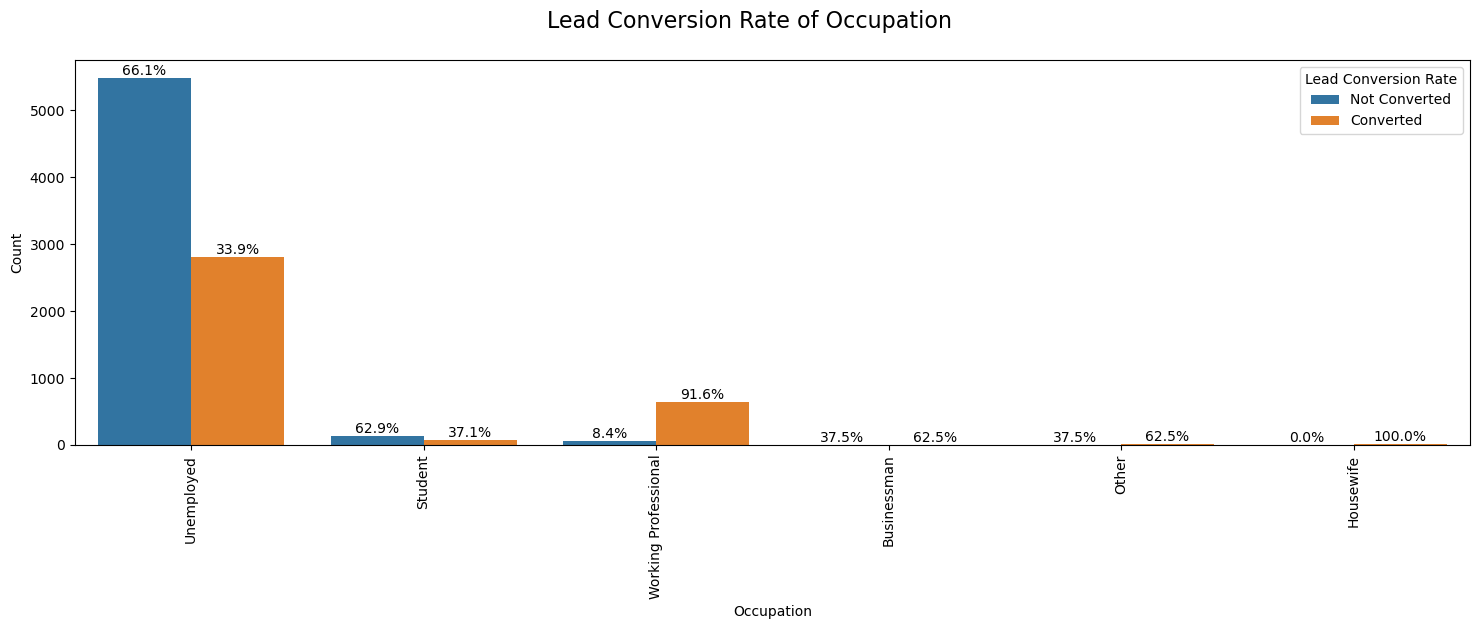

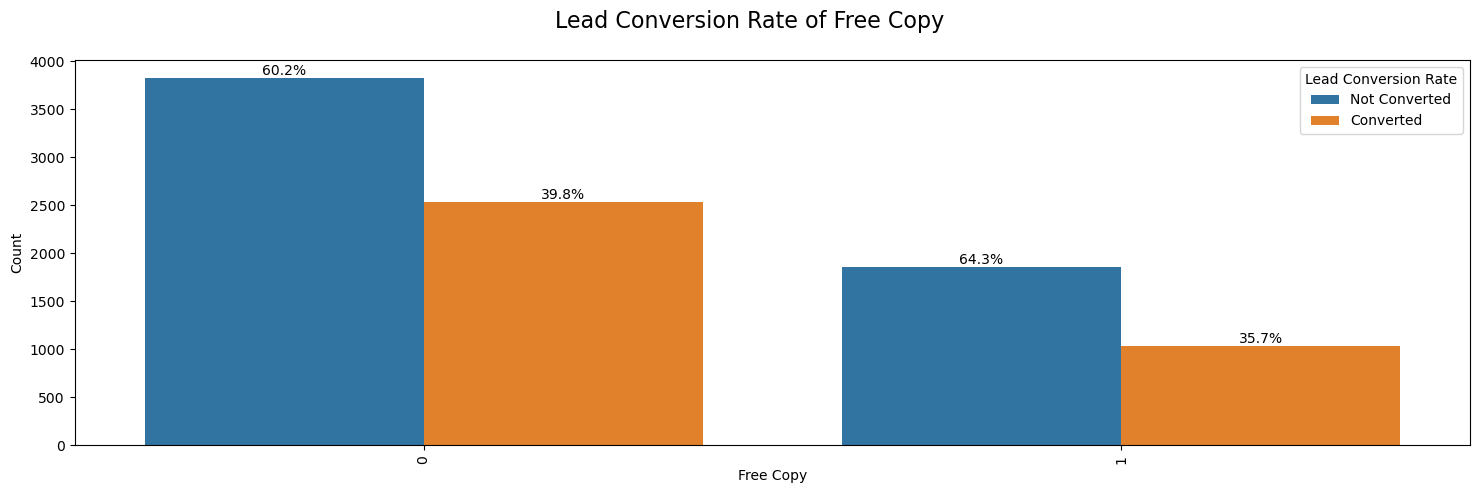

In [50]:
## Applying the function to do Bivariate Analysis on all the categorical columns.

for i in categorical_cols:
    Bivar_Analysis(leads,var=i)

* **Lead Origin** - It is evidene that the most effective lead origin is 'Landing Page Submission' with a Lead Conversion Rate of 36.2% followed by API with 31.1% of conversion rate. Even though only 7.8% of the total customers were identified to be a lead through 'Lead Add Form', 92.5% of them were successfully converted.
* **Lead Source** - 'Google' is the most effective lead source with 40.4% of lead conversion rate, followd by 'Direct Traffic'(32.2%). It can be seen that 'Reference' has the highest lead conversion rate (91.8%) but there are only 5.8% of customers who were sourced through this mode.  
* **Do Not Email** - Only 16.1% is the lead conversion rate among the customers who opted out from receiving emails. It is evident that the chances of getting a conversion from  customers who do not wish to receive email communication about the course is too low.
* **Last Activity** - The most effective category among 'Last Activity' is 'SMS Sent' with a lead conversion rate of 62.9%, followed by 'Email Opened'(37.7%).
* **Specialization** - 'Others', 'Finance Management','Marketing Management', 'Human Resource Management'and 'Operations Management' - all these categories show good lead conversion rates.
* **Occupation** - 'Working Professional' has 91.6 % lead conversion rate, but there are only 7.6% of 'Working Professional' out of the total customers. The most effective category is 'Unemployed' with 33.9% of lead conversion rate.
* **Free Copy** - Out of the total customers who opted not to receive a 'Free Copy', 39.8% got converted, and 35.7% of leads got converted among the customers who opted to receive a 'Free Copy'.

#### Bivariate Analysis of Numerical Variables

In [51]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lead Origin           9240 non-null   object 
 1   Lead Source           9240 non-null   object 
 2   Do Not Email          9240 non-null   int64  
 3   Converted             9240 non-null   int64  
 4   TotalVisits           9240 non-null   float64
 5   Time Spent            9240 non-null   int64  
 6   Page Views Per Visit  9240 non-null   float64
 7   Last Activity         9240 non-null   object 
 8   Specialization        9240 non-null   object 
 9   Occupation            9240 non-null   object 
 10  Free Copy             9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


<Figure size 1700x500 with 0 Axes>

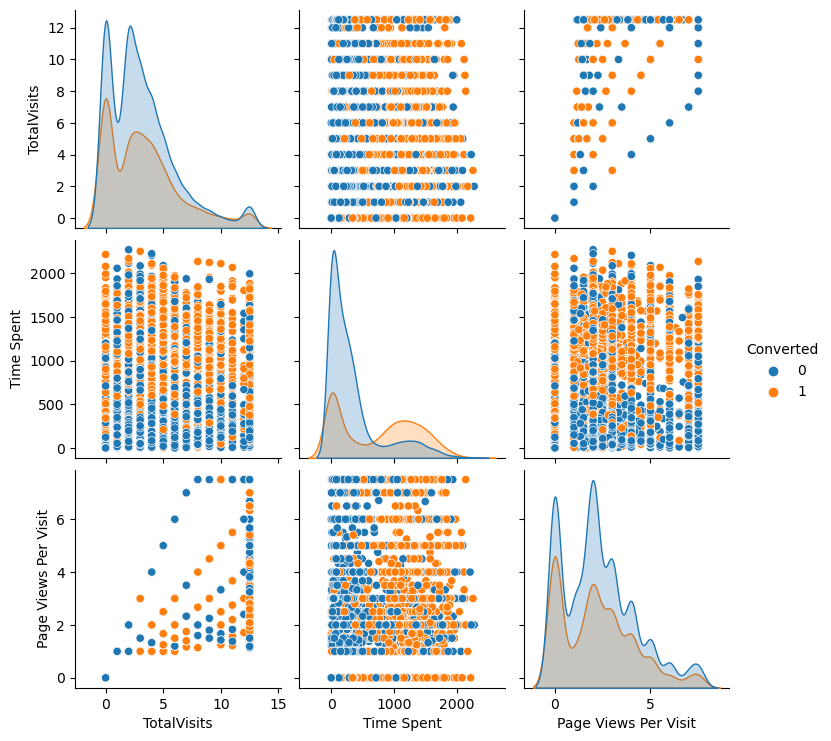

In [52]:
## Plotting pairplot for numeric variables.

num_cols = ["Converted", "TotalVisits", "Time Spent", "Page Views Per Visit"]

plt.figure(figsize = (17, 5))
sns.pairplot(data = leads, vars = num_cols[1:], hue = "Converted")                                  
plt.show()

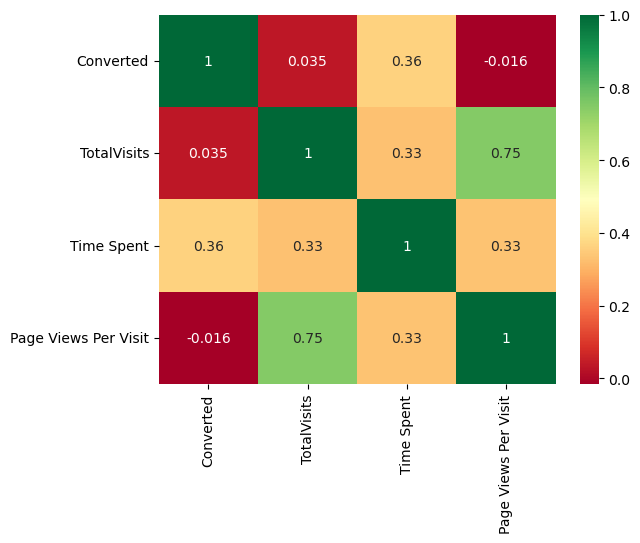

In [53]:
## Plotting a heatmap to check the correlation between numerical variables.

sns.heatmap(data = leads[num_cols].corr(), cmap = "RdYlGn", annot = True)
plt.show()

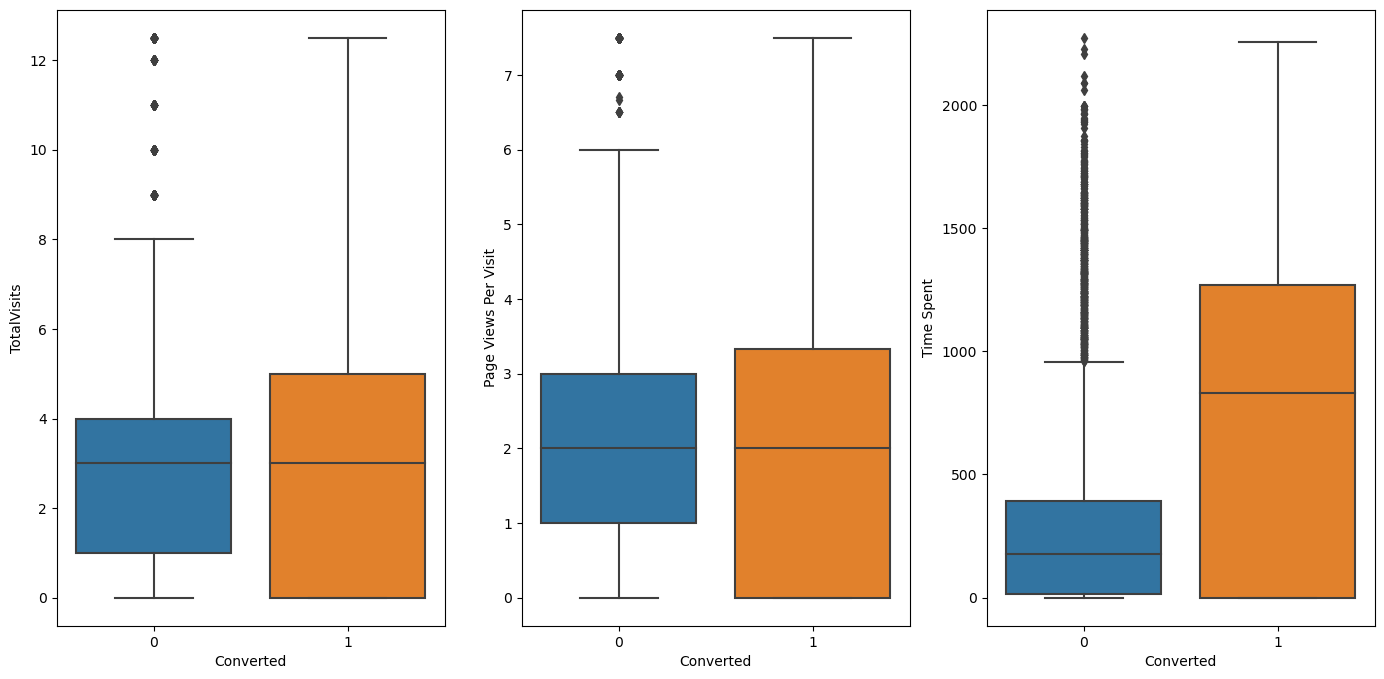

In [54]:
## Plotting a boxplot for numeric variables ('Converted' as hue).

plt.figure(figsize=(17, 8))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Time Spent', x = 'Converted', data = leads)
plt.show()

* There is a strong positive correlation between 'Total Visits' and 'Page Views per Visit'. 
* Customers who spend more time on website have higher lead conversion rate.

## Data Preparation

In [55]:
leads.dtypes

Lead Origin              object
Lead Source              object
Do Not Email              int64
Converted                 int64
TotalVisits             float64
Time Spent                int64
Page Views Per Visit    float64
Last Activity            object
Specialization           object
Occupation               object
Free Copy                 int64
dtype: object

In [56]:
## Creating dummy variables for categorical variables.

dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                 'Occupation']], drop_first = True)

In [57]:
## Merging the created dummy variables to the original dataframe.

leads = pd.concat([leads, dummy], axis = 1)

In [58]:
## Checking the head of the updated dataframe.

leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Time Spent  Page Views Per Visit            Last Activity  \
0          0.0           0                   0.0  Page Visited on Website   
1          5.0         674                   2.5             Email Opened   
2          2.0        1532                   2.0             Email Opened   
3          1.0         305                   1.0                   Others   
4          2.0        1428                   1.0        Converted to Lead   

            Specialization  Occupation  Free Copy  \
0                   Others  Unemployed          0   
1                   Others  Unemployed          0   
2  Business Administration     Student          1   
3    Media and Advertising  Unemployed          0   
4                   Others  Unemployed          0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2   

Since the created dummies for categorical variables have been merged with the original dataframe, we can drop the original columns now. 

In [59]:
## Dropping the original categorical columns.

leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Occupation'],1)

In [60]:
## Checking the info of the updated dataframe.

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Time Spent                                9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free Copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

## Test - Train Split

In [61]:
## Assigning all the predictor variables to X.

X = leads.drop('Converted', axis = 1)

## Assigning Target variable to y.

y = leads['Converted']

In [62]:
## Splitting the dataset into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,random_state=100)

In [63]:
## Checking the shape of the training and testing sets.

print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (6468, 47) 
y_train: (6468,)
X_test: (2772, 47) 
y_test: (2772,)


## Feature Scaling

In [64]:
## Applying Standard Scaler for re-scaling the features.

scaler = StandardScaler()

## Fetching all 'int64' and 'float64' columns from the dataset for scaling.

cols_scaling = X_train.select_dtypes(include=['int64','float64']).columns

X_train[cols_scaling] = scaler.fit_transform(X_train[cols_scaling])

In [65]:
## Checking the head of the training dataset after scaling.

X_train.head()

Do Not Email  TotalVisits  Time Spent  Page Views Per Visit  Free Copy  \
1871     -0.291638    -1.064974   -0.885371             -1.184892  -0.673169   
6795     -0.291638     0.262370    0.005716             -0.488713   1.485511   
3516     -0.291638     0.594206   -0.691418              0.123715  -0.673169   
8105     -0.291638     0.594206    1.365219              1.432322  -0.673169   
3934     -0.291638    -1.064974   -0.885371             -1.184892  -0.673169   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Olark Chat  \
1871                     0                   0                       1   
6795                     0                   0                       0   
3516                     0                   0                       1   
8105                     0                   1                       0   
3934                     0                   0                       1   

      Lead Source_Organic Search  Lead Source_Others  Lead Source_Reference  \
1871                           0                   0                      0   
6795                           0                   0                      0   
3516                           0                   0                      0   
8105                           0                   0                      0   
3934                           0                   0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
1871                           0                             0   
6795                           0                             0   
3516                           0                             0   
8105                           0                             0   
3934                           0                             0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1871                            0                                 0   
6795                            0                                 0   
3516                            0                                 0   
8105                            0                                 0   
3934                            0                                 0   

      Last Activity_Email Opened  Last Activity_Olark Chat Conversation  \
1871                           1                                      0   
6795                           1                                      0   
3516                           1                                      0   
8105                           0                                      0   
3934                           1                                      0   

      Last Activity_Others  Last Activity_Page Visited on Website  \
1871                     0                                      0   
6795                     0                                      0   
3516                     0                                      0   
8105                     0                                      0   
3934                     0                                      0   

      Last Activity_SMS Sent  Specialization_Business Administration  \
1871                       0               

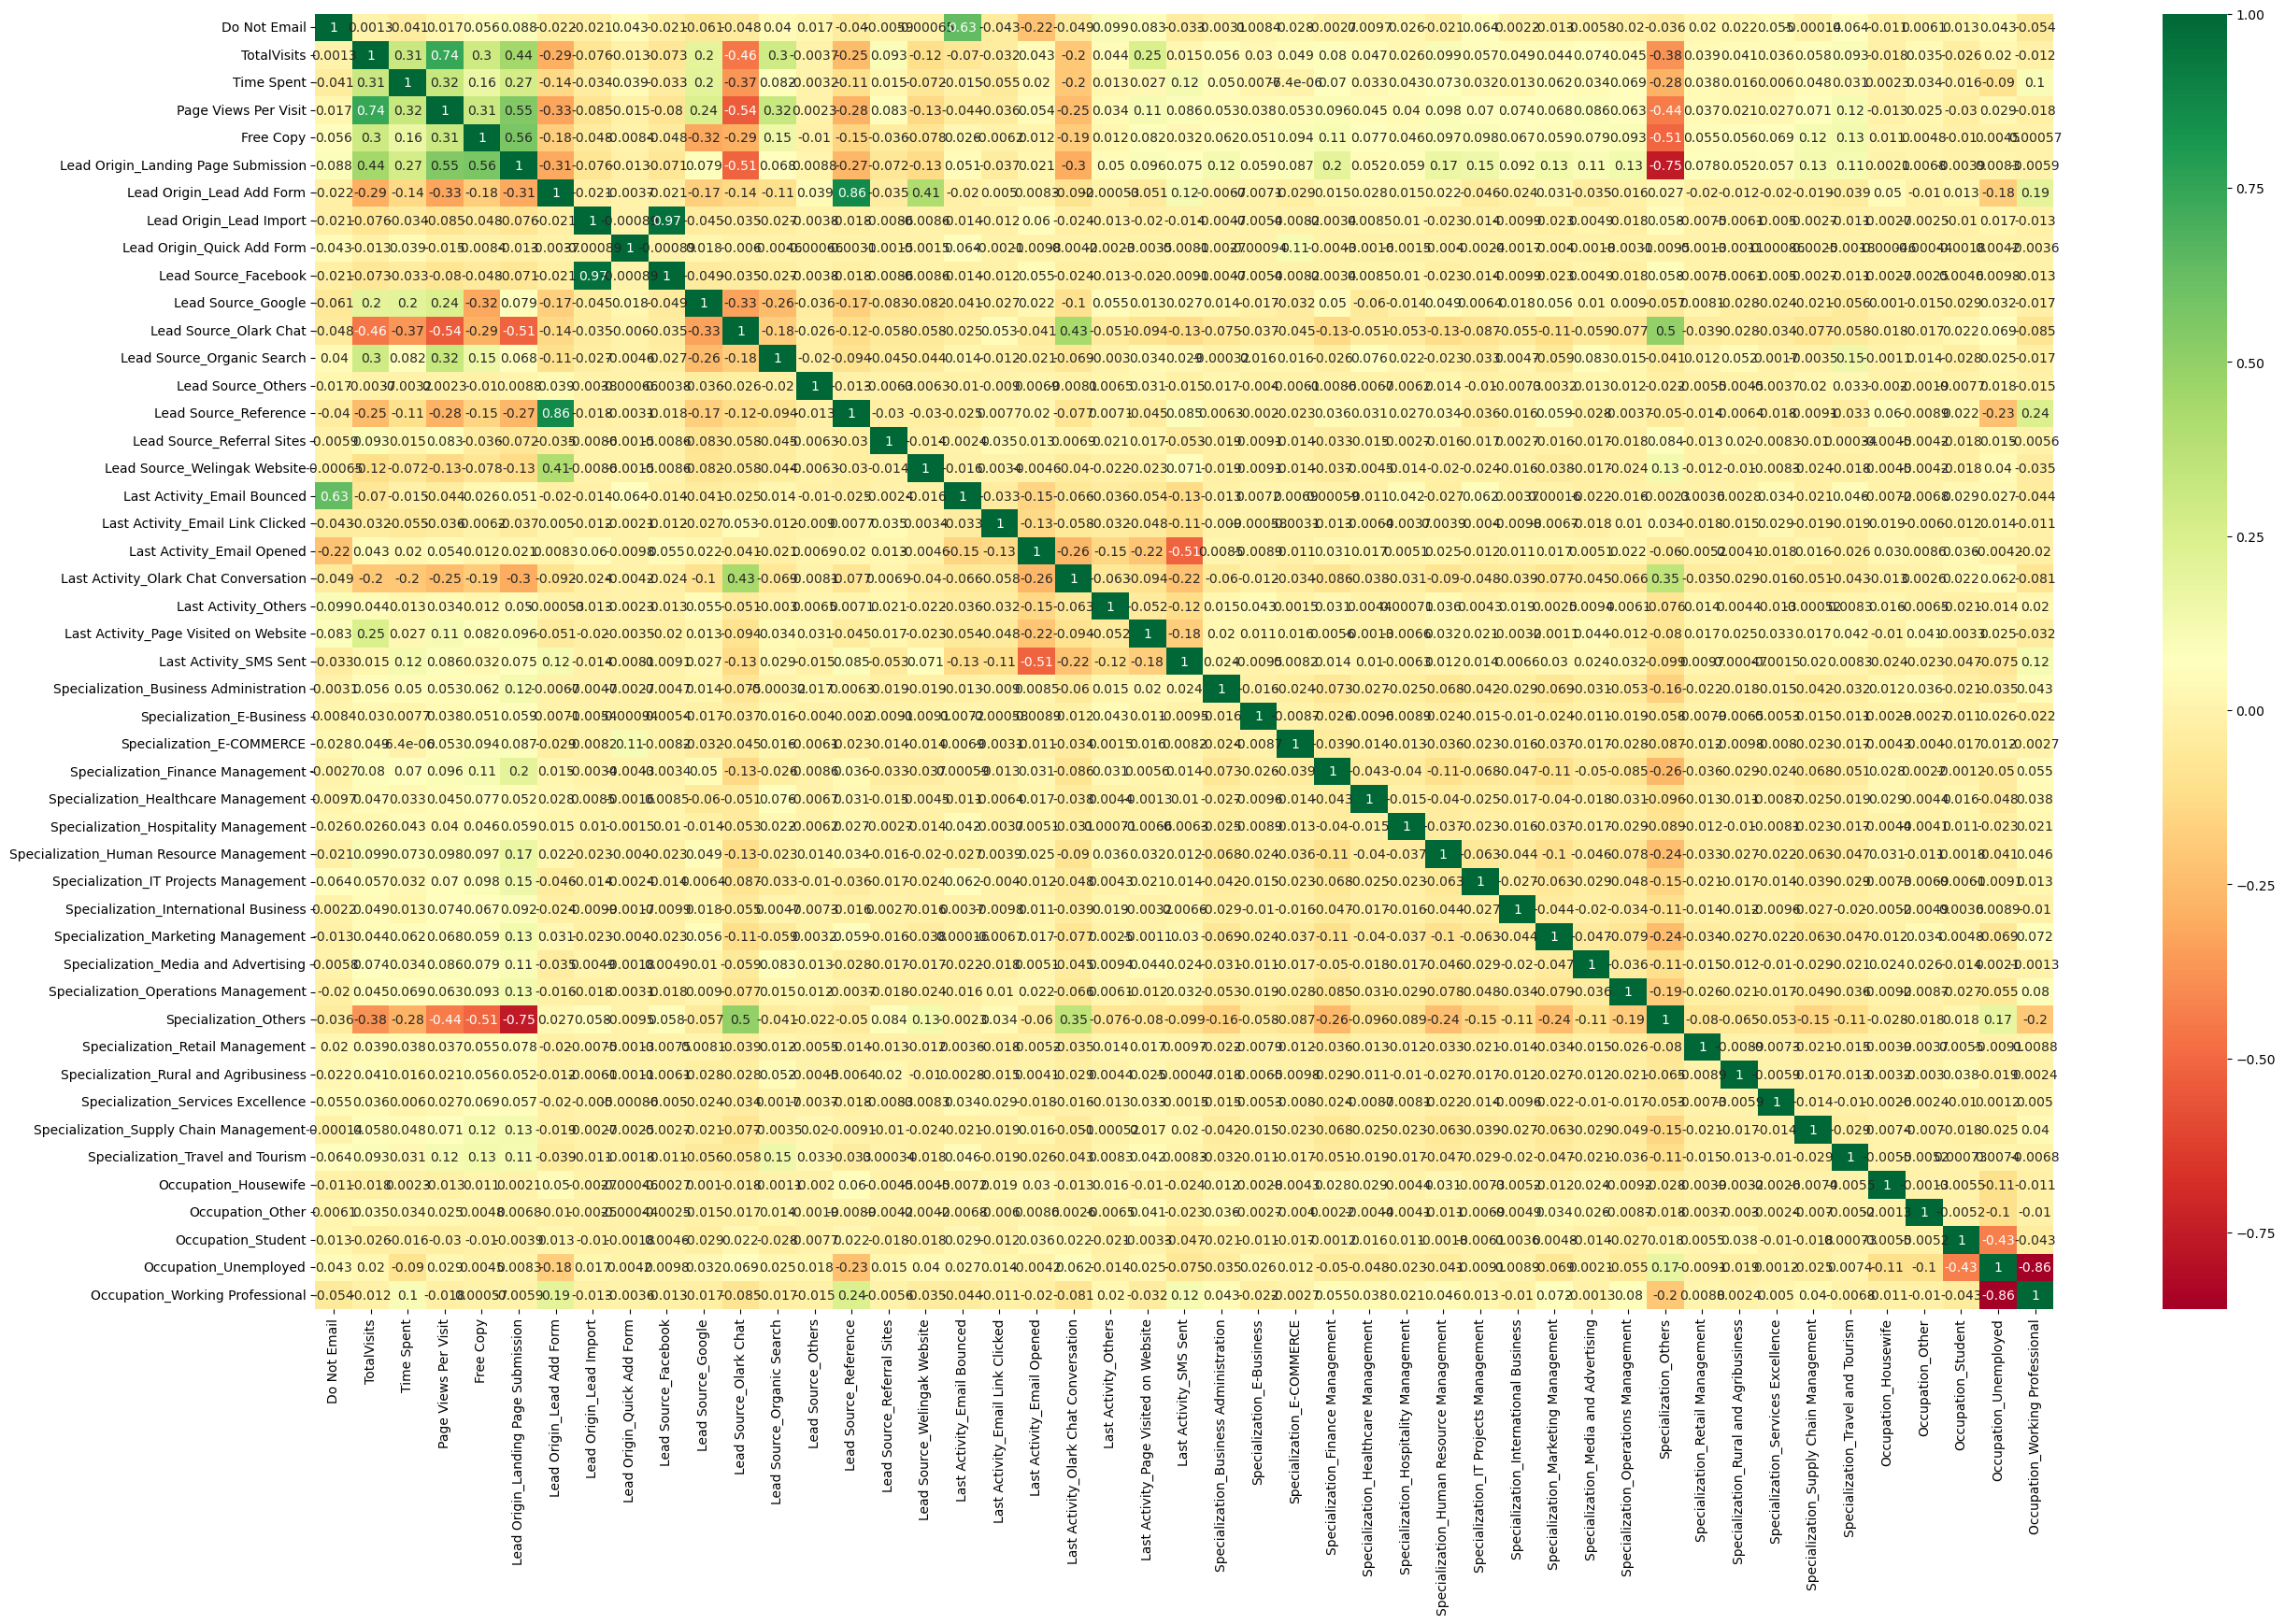

In [66]:
## Checking the correlation coefficient to see which variables are highly correlated post data preparation and rescaling.

plt.figure(figsize = (30, 18))
sns.heatmap(X_train.corr(), cmap="RdYlGn", annot=True)
plt.show()

As the above heatmap has so many columns, the readability of the plot is not really good. It would be a good idea to pick the suspected variables which might have high correlation with each other from the above plot and plotting a new heatmap.

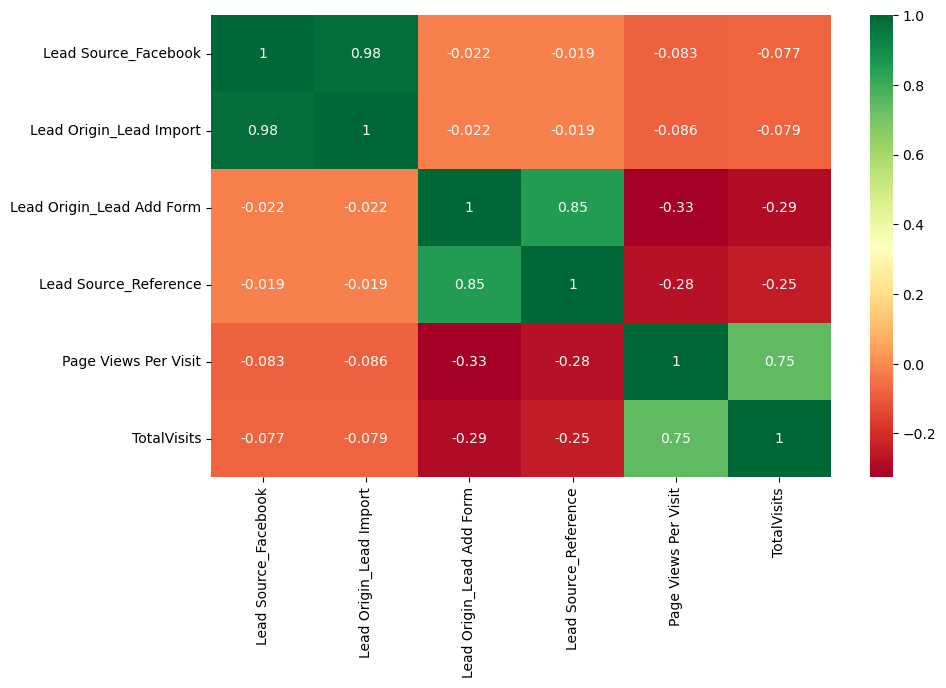

In [67]:
## Plotting a heatmap with the suspected variables.

susp_vars = leads[['Lead Source_Facebook','Lead Origin_Lead Import','Lead Origin_Lead Add Form', 'Lead Source_Reference',
             'Page Views Per Visit', 'TotalVisits']]

plt.figure(figsize = (10,6))        
sns.heatmap(susp_vars.corr(),cmap = "RdYlGn", annot = True)
plt.show()

* 'Lead Origin_Lead Import' and 'Lead Source_Facebook' has a high positive corelation of 0.98.
* 'Lead Origin_Lead Add Form' and 'Lead Source_Reference' has a high positive corelation of 0.85.

We can drop one of these variables from each pair.

In [68]:
## Dropping 'Lead Origin_Lead Import' and 'Lead Origin_Lead Add Form' from both X_train and X_test datasets.

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## Model Building

#### Feature Selection Using RFE (Recursive Feature Elimination)

In [69]:
## Creating a Logistic Regression object.

logreg = LogisticRegression()

In [70]:
# Running 'RFE' and selecting 15 variables as output.

rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [71]:
# Checking the features that have been selected by RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 12),
 ('TotalVisits', False, 10),
 ('Time Spent', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Free Copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 13),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 24),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 28),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 21),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 14),
 ('Specialization_E-Business', False, 31),
 ('Specialization_E-COMMER

In [72]:
## Creating a dataframe of all the features that have been selected by RFE for better readability.

rfe_df = pd.DataFrame()
rfe_df['Variable'] = X_train.columns
rfe_df['Selected by RFE'] = rfe.support_
rfe_df['Ranking'] = rfe.ranking_
rfe_df.sort_values(by = 'Ranking')

Variable  Selected by RFE  Ranking
44           Occupation_Working Professional             True        1
21                    Last Activity_SMS Sent             True        1
20     Last Activity_Page Visited on Website             True        1
19                      Last Activity_Others             True        1
17                Last Activity_Email Opened             True        1
16          Last Activity_Email Link Clicked             True        1
34                     Specialization_Others             True        1
14              Lead Source_Welingak Website             True        1
11                        Lead Source_Others             True        1
12                     Lead Source_Reference             True        1
40                      Occupation_Housewife             True        1
5        Lead Origin_Landing Page Submission             True        1
2                                 Time Spent             True        1
9                     Lead Source_Olark Chat             True        1
27     Specialization_Hospitality Management             True        1
7                       Lead Source_Facebook            False        2
43                     Occupation_Unemployed            False        3
41                          Occupation_Other            False        4
42                        Occupation_Student            False        5
36     Specialization_Rural and Agribusiness            False        6
35          Specialization_Retail Management            False        7
30     Specialization_International Business            False        8
3                       Page Views Per Visit            False        9
1                                TotalVisits            False       10
18     Last Activity_Olark Chat Conversation            False       11
0                               Do Not Email            False       12
6                 Lead Origin_Quick Add Form            False       13
22    Specialization_Business Administration            False       14
33      Specialization_Operations Management            False       15
28  Specialization_Human Resource Management            False       16
31       Specialization_Marketing Management            False       17
4                                  Free Copy            False       18
37        Specialization_Services Excellence            False       19
24                 Specialization_E-COMMERCE            False       20
15               Last Activity_Email Bounced            False       21
29     Specialization_IT Projects Management            False       22
26      Specialization_Healthcare Management            False       23
8                         Lead Source_Google            False       24
25         Specialization_Finance Management            False       25
10                Lead Source_Organic Search            False       26
38    Specialization_Supply Chain Management            False       27
13                Lead Source_Referral Sites            False       28
32      Specialization_Media and Advertising            False       29
39         Specialization_Travel and Tourism            False       30
23                 Specialization_E-Business            False       31

In [73]:
## Assigning all the columns which are selected by RFE to a  variable.

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Time Spent', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Occupation_Housewife', 'Occupation_Working Professional'],
      dtype='object')

### Model 1

In [74]:
## Creating X_train dataframe with variables selected by RFE.

X_train_rfe = X_train[rfe_col]

# Adding a constant variable. 

X_train_sm1 = sm.add_constant(X_train_rfe)

# Creating a fitted model.

lrm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

## Summary of the Logistic Regression Model.

lrm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.5
Date:                Sat, 16 Sep 2023   Deviance:                       5458.9
Time:                        12:13:56   Pearson chi2:                 7.89e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3845
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6261      0.164     -9.889      0.000      -1.948      -1.304
Time Spent                                1.0519      0.039     27.204      0.000       0.976       1.128
Lead Origin_Landing Page Submission      -1.2261      0.126     -9.763      0.000      -1.472      -0.980
Lead Source_Olark Chat                    0.8889      0.117      7.600      0.000       0.660       1.118
Lead Source_Others                        0.9756      0.515      1.896      0.058      -0.033       1.984
Lead Source_Reference                     2.9067      0.214     13.572      0.000       2.487       3.327
Lead Source_Welingak Website              5.3493      0.729      7.340      0.000       3.921       6.778
Last Activity_Email Link Clicked          0.9289      0.246      3.780      0.000       0.447       1.410
Last Activity_Email Opened                1.4956      0.128     11.728      0.000       1.246       1.746
Last Activity_Others                      1.3757      0.219      6.277      0.000       0.946       1.805
Last Activity_Page Visited on Website     0.8490      0.179      4.741      0.000       0.498       1.200
Last Activity_SMS Sent                    2.6130      0.131     19.987      0.000       2.357       2.869
Specialization_Hospitality Management    -1.0274      0.325     -3.165      0.002      -1.664      -0.391
Specialization_Others                    -1.1419      0.121     -9.415      0.000      -1.380      -0.904
Occupation_Housewife                     22.8725   1.34e+04      0.002      0.999   -2.63e+04    2.63e+04
Occupation_Working Professional           2.7046      0.190     14.206      0.000       2.331       3.078
=========================================================================================================
"""

The p-value of 'Occupation_Housewife' is 0.999 which is higher than the usual accepted threshold of 0.05. Hence we need to remove the column from the model.

In [75]:
## Dropping 'Occupation_Housewife' column from the model due to high p-value.

rfe_col = rfe_col.drop('Occupation_Housewife')

### Model 2

In [76]:
## Creating X_train dataframe with variables selected by RFE.

X_train_rfe = X_train[rfe_col]

# Adding a constant variable.

X_train_sm2 = sm.add_constant(X_train_rfe)

# Creating a fitted model.

lrm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

## Summary of the Logistic Regression Model.

lrm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.3
Date:                Sat, 16 Sep 2023   Deviance:                       5472.6
Time:                        12:13:56   Pearson chi2:                 7.93e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3832
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6253      0.164     -9.888      0.000      -1.947      -1.303
Time Spent                                1.0511      0.039     27.212      0.000       0.975       1.127
Lead Origin_Landing Page Submission      -1.2212      0.125     -9.731      0.000      -1.467      -0.975
Lead Source_Olark Chat                    0.8881      0.117      7.596      0.000       0.659       1.117
Lead Source_Others                        0.9696      0.514      1.885      0.059      -0.039       1.978
Lead Source_Reference                     2.9239      0.214     13.665      0.000       2.505       3.343
Lead Source_Welingak Website              5.3489      0.729      7.340      0.000       3.921       6.777
Last Activity_Email Link Clicked          0.9371      0.245      3.830      0.000       0.458       1.417
Last Activity_Email Opened                1.5009      0.127     11.774      0.000       1.251       1.751
Last Activity_Others                      1.3965      0.218      6.403      0.000       0.969       1.824
Last Activity_Page Visited on Website     0.8463      0.179      4.727      0.000       0.495       1.197
Last Activity_SMS Sent                    2.6100      0.131     19.968      0.000       2.354       2.866
Specialization_Hospitality Management    -1.0342      0.325     -3.186      0.001      -1.670      -0.398
Specialization_Others                    -1.1451      0.121     -9.446      0.000      -1.383      -0.907
Occupation_Working Professional           2.6973      0.190     14.171      0.000       2.324       3.070
=========================================================================================================
"""

The p-value of 'Lead Source_Others' is 0.059 which is higher than the usual accepted threshold of 0.05. Hence we are removing the column from the model.

In [77]:
## Dropping 'Lead Source_Others' column from the model due to high p-value.

rfe_col = rfe_col.drop('Lead Source_Others')

### Model 3

In [78]:
## Creating X_train dataframe with variables selected by RFE.

X_train_rfe = X_train[rfe_col]

# Adding a constant variable.

X_train_sm3 = sm.add_constant(X_train_rfe)

# Creating a fitted model.

lrm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

## Summary of the Logistic Regression Model.

lrm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.0
Date:                Sat, 16 Sep 2023   Deviance:                       5476.0
Time:                        12:13:56   Pearson chi2:                 7.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6095      0.164     -9.807      0.000      -1.931      -1.288
Time Spent                                1.0490      0.039     27.185      0.000       0.973       1.125
Lead Origin_Landing Page Submission      -1.2304      0.125     -9.806      0.000      -1.476      -0.985
Lead Source_Olark Chat                    0.8792      0.117      7.529      0.000       0.650       1.108
Lead Source_Reference                     2.9126      0.214     13.620      0.000       2.493       3.332
Lead Source_Welingak Website              5.3413      0.729      7.330      0.000       3.913       6.769
Last Activity_Email Link Clicked          0.9328      0.245      3.814      0.000       0.453       1.412
Last Activity_Email Opened                1.5002      0.127     11.777      0.000       1.251       1.750
Last Activity_Others                      1.3966      0.218      6.405      0.000       0.969       1.824
Last Activity_Page Visited on Website     0.8530      0.179      4.772      0.000       0.503       1.203
Last Activity_SMS Sent                    2.6069      0.131     19.961      0.000       2.351       2.863
Specialization_Hospitality Management    -1.0380      0.324     -3.199      0.001      -1.674      -0.402
Specialization_Others                    -1.1536      0.121     -9.520      0.000      -1.391      -0.916
Occupation_Working Professional           2.6914      0.190     14.144      0.000       2.318       3.064
=========================================================================================================
"""

It can be seen that p - values of all the variables are within the permissible threshold (0.05). Model seems suitable for further analysis.

In [79]:
## Checking VIF of all the variables in Model 3.

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif.reset_index(drop=True)
vif

Features   VIF
0     Lead Origin_Landing Page Submission  2.98
1              Last Activity_Email Opened  2.41
2                   Specialization_Others  2.32
3                  Last Activity_SMS Sent  2.30
4                  Lead Source_Olark Chat  1.88
5                   Lead Source_Reference  1.34
6   Last Activity_Page Visited on Website  1.29
7                              Time Spent  1.25
8         Occupation_Working Professional  1.21
9                    Last Activity_Others  1.13
10       Last Activity_Email Link Clicked  1.10
11           Lead Source_Welingak Website  1.09
12  Specialization_Hospitality Management  1.02

* VIF values of all variables in Model 3 are less than 5. It indicates that there are no high multicollinearity among the variables.
* p - values of all the variables in Model 3 are less than 0.05. It indicates that the variables are statistically significant predictors.
* Hence we can consider Model 3 as our final Logistic Regression Model for making predictions.

## Model Evaluation

In [80]:
## Predicting the probabilities on the train dataset and assigning as an array.

y_train_pred = lrm3.predict(X_train_sm3).values.reshape(-1)
y_train_pred

array([0.46034884, 0.07674437, 0.24803465, ..., 0.21205482, 0.03516581,
       0.21205482])

In [81]:
## Creating a dataframe with the actual converted flag and probability of conversion. 

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion Probability':y_train_pred})

## Assigning 'Prospect ID' to each values.

y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Conversion Probability  Prospect ID
0          0                0.460349         1871
1          0                0.076744         6795
2          0                0.248035         3516
3          0                0.768371         8105
4          0                0.212055         3934

In this case, we are taking 0.5 as a benchmark/cut-off score arbitrarily. Anything above 0.5 will be considered as a lead that can be converted and all others will be considered as less likely to be converted.

In [82]:
## Mapping the predicted value according to the cut off.

y_train_pred_final['Predicted'] = y_train_pred_final["Conversion Probability"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion Probability  Prospect ID  Predicted
0          0                0.460349         1871          0
1          0                0.076744         6795          0
2          0                0.248035         3516          0
3          0                0.768371         8105          1
4          0                0.212055         3934          0

In [83]:
## Confusion matrix  (Actual / Predicted).

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3583  419]
 [ 836 1630]]


In [84]:
# Actual/ Predicted    # Not converted    # Converted  

# Not_converted             3583              419
# Converted                  836             1630

In [85]:
## Checking all the relevant metrics.

## Creating a UDF to check all the relevant metrics.

def all_metrics(confusion):
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    Accuracy             =    round((TN+TP) / float(TN+TP+FN+FP), 4)
    Sensitivity          =    round(TP / float(TP+FN), 4)
    Specificity          =    round(TN / float(TN+FP), 4)
    False_Positive_Rate  =    round(FP/ float(TN+FP), 4)
    Precision            =    round(TP / float(TP+FP), 4)
    Recall               =    round(TP / float(TP+FN), 4)
    Neg_Predictive_Value =    round(TN / float(TN+ FN), 4)

    print('Accuracy                  =', Accuracy)
    print('Sensitivity               =', Sensitivity)
    print('Specificity               =', Specificity)
    print('False Positive Rate       =', False_Positive_Rate)
    print('Precision                 =', Precision)
    print('Recall                    =', Recall)
    print('Negative Predictive Value =', Neg_Predictive_Value)
    
## Calling the function.

all_metrics(confusion)

Accuracy                  = 0.806
Sensitivity               = 0.661
Specificity               = 0.8953
False Positive Rate       = 0.1047
Precision                 = 0.7955
Recall                    = 0.661
Negative Predictive Value = 0.8108


#### Plotting the ROC Curve

In [86]:
## UDF to create ROC curve.

def roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

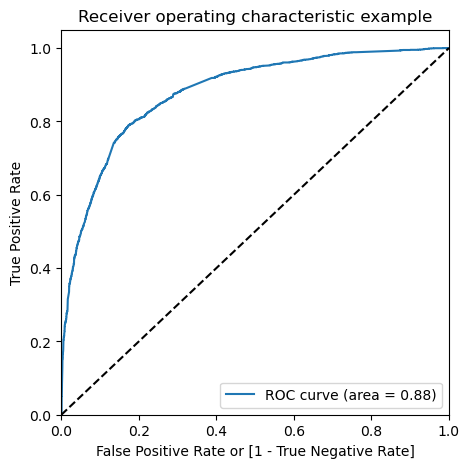

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Conversion Probability'],
                                         drop_intermediate = False )
roc(y_train_pred_final['Converted'], y_train_pred_final['Conversion Probability'])

The Area Under the Curve(AUC) is 0.88, which is quite a good value. (AUC tells us how much the model is capable of distinguishing between classes.)

#### Finding the Optimal Cut-off

In [88]:
## Creating columns with different probability cut-offs.

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

Converted  Conversion Probability  Prospect ID  Predicted  0.0  0.1  0.2  \
0          0                0.460349         1871          0    1    1    1   
1          0                0.076744         6795          0    1    0    0   
2          0                0.248035         3516          0    1    1    1   
3          0                0.768371         8105          1    1    1    1   
4          0                0.212055         3934          0    1    1    1   

   0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    0    0    0    0    0  
1    0    0    0    0    0    0    0  
2    0    0    0    0    0    0    0  
3    1    1    1    1    1    0    0  
4    0    0    0    0    0    0    0

In [89]:
## Calculating Accuracy, Sensitivity and Specificity for various probability cutoffs.
## Creating a dataframe to display the metrics.

cutoff = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in nums:
    con_m1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    
    total1 = sum(sum(con_m1))
    
    Accuracy = (con_m1[0,0] + con_m1[1,1]) / total1
    Sensitivity = con_m1[1,1] / (con_m1[1,0] + con_m1[1,1])
    Specificity = con_m1[0,0] / (con_m1[0,0] + con_m1[0,1])
    
    cutoff.loc[i] = [ i , Accuracy, Sensitivity, Specificity]

print(cutoff)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.579777     0.974453     0.336582
0.2          0.2  0.722944     0.921736     0.600450
0.3          0.3  0.790353     0.833739     0.763618
0.4          0.4  0.813544     0.766423     0.842579
0.5          0.5  0.805968     0.660989     0.895302
0.6          0.6  0.795300     0.590430     0.921539
0.7          0.7  0.778602     0.505677     0.946777
0.8          0.8  0.753865     0.403487     0.969765
0.9          0.9  0.707174     0.246959     0.990755


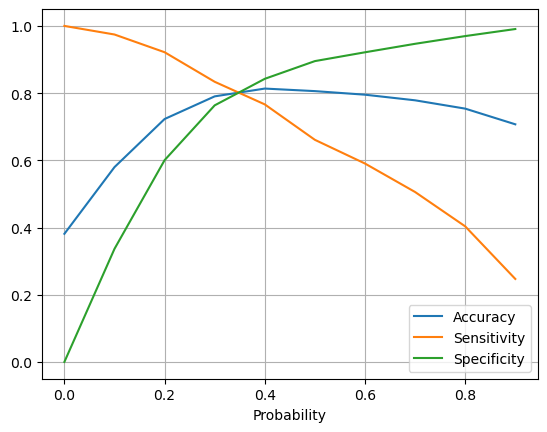

In [90]:
## Plotting Accuracy, Sensitivity and Specificity for various probability cutoffs.

cutoff.plot.line(x = 'Probability', y = ['Accuracy','Sensitivity','Specificity'])

plt.legend(labels = ['Accuracy','Sensitivity','Specificity'])
plt.grid(True)

plt.show()

* The point where all three - Accuracy, Sensitivity and Specificity curves meet is at a Probability of 0.35(approx.).
* Hence taking 0.35 as the optimal cut-off point for Probability threshold.

In [91]:
## Mapping the predicted value according to the cut off.

y_train_pred_final['Final Prediction'] = y_train_pred_final['Conversion Probability'].map( lambda x: 1 if x > 0.35 else 0)

## Dropping unwanted columns from the dataframe.

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Conversion Probability  Prospect ID  Final Prediction
0          0                0.460349         1871                 1
1          0                0.076744         6795                 0
2          0                0.248035         3516                 0
3          0                0.768371         8105                 1
4          0                0.212055         3934                 0

In [92]:
## Confusion matrix  (Actual / Predicted)

confusion1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Final Prediction"])
print(confusion1)

[[3242  760]
 [ 489 1977]]


In [93]:
# Actual/ Predicted    # Not converted    # Converted  

# Not_converted             3242              760
# Converted                  489             1977

In [94]:
## Checking all the relevant metrics.

all_metrics(confusion1)

Accuracy                  = 0.8069
Sensitivity               = 0.8017
Specificity               = 0.8101
False Positive Rate       = 0.1899
Precision                 = 0.7223
Recall                    = 0.8017
Negative Predictive Value = 0.8689


#### Precision and recall tradeoff

In [95]:
## Creating Precision-Recall trade-off curve.

y_train_pred_final['Converted'], y_train_pred_final['Final Prediction']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Conversion Probability'])

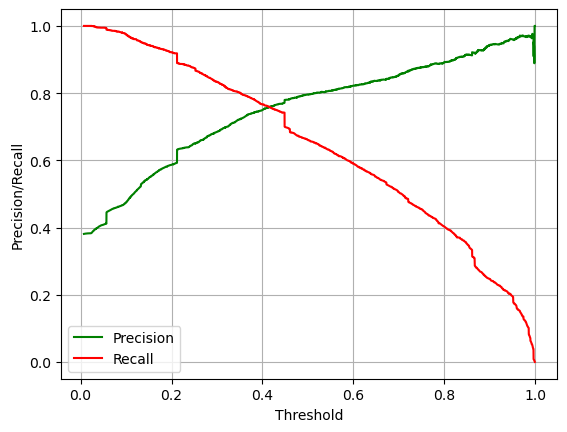

In [96]:
## Plotting Precision-Recall trade-off curve.

plt.plot(thresholds, p[:-1], "g-", label = "Precision")
plt.plot(thresholds, r[:-1], "r-", label = "Recall")


plt.legend(loc = 'lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.grid(True)

plt.show()

The intersection point is at a probability threshold of 0.41(aprrox) from above curve. It is the threshold value where the model achieves a balance between precision and recall.

In [97]:
## Creating a copy of the dataframe to evaluate the model with Precision-Recall threshold of 0.41.

y_train_precision_recall = y_train_pred_final.copy()

In [98]:
## Adding a new feature with 0.41 cut-off to check if there are improvements in metrics.
## (Sensitivity - Specificity OR Precision - Recall)

y_train_precision_recall['Precision-Recall Prediction'] = y_train_precision_recall['Conversion Probability'].map(lambda x: 1 if x > 0.41 else 0)
    
y_train_precision_recall.head()

Converted  Conversion Probability  Prospect ID  Final Prediction  \
0          0                0.460349         1871                 1   
1          0                0.076744         6795                 0   
2          0                0.248035         3516                 0   
3          0                0.768371         8105                 1   
4          0                0.212055         3934                 0   

   Precision-Recall Prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [99]:
## Confusion matrix  (Actual / Predicted)

confusion2 = metrics.confusion_matrix(y_train_precision_recall["Converted"], y_train_precision_recall["Precision-Recall Prediction"])
print(confusion2)

[[3396  606]
 [ 587 1879]]


In [100]:
# Actual/ Predicted    # Not converted    # Converted  

# Not_converted             3396              606
# Converted                  587             1879

In [101]:
## Checking all the relevant metrics.

all_metrics(confusion2)

Accuracy                  = 0.8156
Sensitivity               = 0.762
Specificity               = 0.8486
False Positive Rate       = 0.1514
Precision                 = 0.7561
Recall                    = 0.762
Negative Predictive Value = 0.8526


* It can be seen that with the Precision-Recall cut-off of 0.41, Sensitivity and Recall have dropped to below 80%.
* It was possible to achieve 80% with the Sensitivity - Specificity cut-off of 0.35. Hence we will continue with the 0.35 Sensitivity - Specificity cut-off.

#### Adding Lead Score Feature to Training Dataframe 

According to the problem statement, a higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [102]:
## Adding 'Lead Score' feature to the model. 

y_train_pred_final['Lead Score'] = y_train_pred_final['Conversion Probability'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Conversion Probability  Prospect ID  Final Prediction  \
0          0                0.460349         1871                 1   
1          0                0.076744         6795                 0   
2          0                0.248035         3516                 0   
3          0                0.768371         8105                 1   
4          0                0.212055         3934                 0   

   Lead Score  
0          46  
1           8  
2          25  
3          77  
4          21

## Making predictions on the test set

In [103]:
## Fetching all 'int64' and 'float64' columns from the dataset for scaling.

test_scaling = X_test.select_dtypes(include=['int64','float64']).columns
X_test[test_scaling] = scaler.transform(X_test[test_scaling])

X_test = X_test[rfe_col]
X_test.head()

Time Spent  Lead Origin_Landing Page Submission  Lead Source_Olark Chat  \
4269    0.964504                                    0                       0   
2376   -0.885371                                    0                       0   
7766   -0.777416                                    0                       0   
9199   -0.885371                                    0                       1   
4359   -0.885371                                    0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  \
4269                      0                             0   
2376                      1                             0   
7766                      0                             0   
9199                      0                             0   
4359                      1                             0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4269                                 0                           0   
2376                                 0                           0   
7766                                 0                           0   
9199                                 0                           0   
4359                                 0                           1   

      Last Activity_Others  Last Activity_Page Visited on Website  \
4269                     0                                      0   
2376                     0                                      0   
7766                     1                                      0   
9199                     0                                      0   
4359                     0                                      0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Occupation_Working Professional  
4269                      1                                0  
2376                      1                                0  
7766                      0                                1  
9199                      1                                0  
4359                      0                                0

In [104]:
## Adding a constant variable.

X_test_sm = sm.add_constant(X_test)

## Making predictions using the final model and storing the result in a variable.

y_test_pred = lrm3.predict(X_test_sm)

y_test_pred

4269    0.701736
2376    0.861479
7766    0.840639
9199    0.056640
4359    0.866979
          ...   
8649    0.086349
2152    0.252563
7101    0.212055
5331    0.542593
2960    0.861479
Length: 2772, dtype: float64

In [105]:
## Converting y_test_pred to a dataframe.

y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.701736
2376  0.861479
7766  0.840639
9199  0.056640
4359  0.866979

In [106]:
## Converting y_test to dataframe and assigning it to a variable.

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [107]:
## Inserting 'Prospect ID' in place of  index.

y_test_df['Prospect ID'] = y_test_df.index

## Removing index of both the dataframes to combine them side by side and to form a single dataframe.

y_test_pred.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

## Combining both the dataframes -  y_test_df and y_test_pred.

y_pred_final = pd.concat([y_test_df, y_test_pred], axis = 1)

y_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.701736
1          1         2376  0.861479
2          1         7766  0.840639
3          0         9199  0.056640
4          1         4359  0.866979

In [108]:
## Renaming and re-arranging the columns for better readability. 

y_pred_final = y_pred_final.rename(columns={ 0 : 'Conversion Probability'})
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion Probability'], axis=1)

y_pred_final.head()

Prospect ID  Converted  Conversion Probability
0         4269          1                0.701736
1         2376          1                0.861479
2         7766          1                0.840639
3         9199          0                0.056640
4         4359          1                0.866979

In [109]:
## Mapping the predicted value according to the cut off (0.35 Sensitivity - Specificity cut-off).

y_pred_final['Final Prediction'] = y_pred_final["Conversion Probability"].map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

Prospect ID  Converted  Conversion Probability  Final Prediction
0         4269          1                0.701736                 1
1         2376          1                0.861479                 1
2         7766          1                0.840639                 1
3         9199          0                0.056640                 0
4         4359          1                0.866979                 1

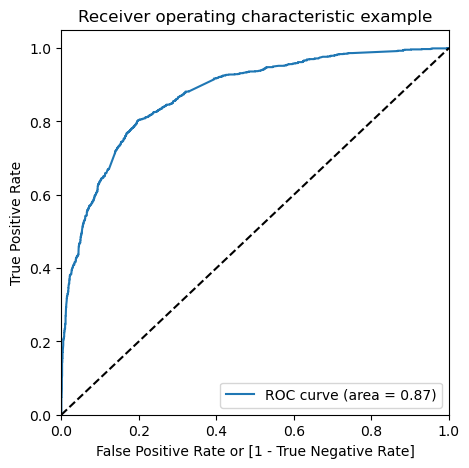

In [110]:
## Plotting an ROC curve for the Test set.

fpr, tpr, thresholds = metrics.roc_curve( y_pred_final['Converted'], y_pred_final['Conversion Probability'],
                                         drop_intermediate = False )
roc(y_pred_final['Converted'], y_pred_final['Conversion Probability'])

The Area Under the Curve(AUC) is 0.87, which is quite a good value. (AUC tells us how much the model is capable of distinguishing between classes.)

#### Test Set Model Evaluation

In [111]:
## Confusion matrix  (Actual / Predicted).

confusion_test = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["Final Prediction"])
print(confusion_test)

[[1352  325]
 [ 227  868]]


In [112]:
# Actual/ Predicted    # Not converted    # Converted  

# Not_converted             1352              325
# Converted                  227             868

In [113]:
## Checking all the relevant metrics.

all_metrics(confusion_test)

Accuracy                  = 0.8009
Sensitivity               = 0.7927
Specificity               = 0.8062
False Positive Rate       = 0.1938
Precision                 = 0.7276
Recall                    = 0.7927
Negative Predictive Value = 0.8562


The evaluation metrics in both train and test sets are really close to each other indicating the model is performing consistently.

#### Adding Lead Score Feature to Test Dataframe

According to the problem statement, a higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [114]:
## Adding 'Lead Score' feature to the model. 

y_pred_final['Lead Score'] = y_pred_final['Conversion Probability'].map( lambda x: round(x * 100))

y_pred_final.head(10)

Prospect ID  Converted  Conversion Probability  Final Prediction  \
0         4269          1                0.701736                 1   
1         2376          1                0.861479                 1   
2         7766          1                0.840639                 1   
3         9199          0                0.056640                 0   
4         4359          1                0.866979                 1   
5         9186          1                0.503228                 1   
6         1631          1                0.419665                 1   
7         8963          1                0.157448                 0   
8         8007          0                0.042761                 0   
9         5324          1                0.298452                 0   

   Lead Score  
0          70  
1          86  
2          84  
3           6  
4          87  
5          50  
6          42  
7          16  
8           4  
9          30

#### Features and their co-efficients of the final model

In [115]:
## Checking existing features and their respective coefficicents of the final model.

params = lrm3.params.sort_values(ascending=False)
params

Lead Source_Welingak Website             5.341301
Lead Source_Reference                    2.912616
Occupation_Working Professional          2.691387
Last Activity_SMS Sent                   2.606919
Last Activity_Email Opened               1.500158
Last Activity_Others                     1.396622
Time Spent                               1.049025
Last Activity_Email Link Clicked         0.932848
Lead Source_Olark Chat                   0.879168
Last Activity_Page Visited on Website    0.853018
Specialization_Hospitality Management   -1.037962
Specialization_Others                   -1.153645
Lead Origin_Landing Page Submission     -1.230448
const                                   -1.609487
dtype: float64

## Comparison between Train and Test dataset

#### Train Dataset

* Accuracy                  = 0.8069
* Sensitivity               = 0.8017
* Specificity               = 0.8101

#### Test Dataset

* Accuracy                  = 0.8009
* Sensitivity               = 0.7927
* Specificity               = 0.8062

The evaluation metrics in both train and test sets are really close to each other which indicates the model is performing consistently. This consistency serves as an indicator of the model's reliability, indicating that it does not suffer from overfitting and responding really good to new data which is a very important aspect while considering the deployment of the model in real-world applications. These findings reflect positively on the model's performance, instilling confidence in its capacity to make precise predictions in future scenarios.

## Summary

**The final Logistic Regression Model has 13 features.**

#### Inferences:

* Leads generated from the Welingkak Website are more likely to convert than leads generated from other sources. The coefficient for Lead Source_Welingak Website is the highest, indicating that this is the most important factor in predicting whether a lead will convert.
* Leads who come from a referral are also more likely to convert than leads who come from other sources. The coefficient for Lead Source_Reference is also positive, though smaller than the coefficient for Lead Source_Welingak Website.
* Leads who are working professionals are more likely to convert than leads who are not working professionals. The coefficient for Occupation_Working Professional is positive, suggesting that this is another important factor in predicting whether a lead will convert.
* Leads who have recently received an SMS are more likely to convert than leads who have not received an SMS. The coefficient for Last Activity_SMS Sent is positive, suggesting that this is another factor that can increase the chances of a lead converting.
* Leads who have recently opened an email are more likely to convert than leads who have not opened an email. The coefficient for Last Activity_Email Opened is also positive, suggesting that this is another factor that can increase the chances of a lead converting.
* Leads who spend more time on the website are more likely to convert.
* Leads who click on a link in an email are more likely to convert.
* Leads who chat with a representative from Olark chat are more likely to convert.
* Leads who visit the website multiple times are more likely to convert.
* The 'Specialization_Hospitality Management' and 'Specialization_Others' features have negative coefficients indicating that leads with these specializations are less likely to achieve the desired outcome. These specializations may be associated with lower conversion rates.
* Leads who come through a 'Landing Page Submission' are less likely to convert.

### The top 3 variables in the model that contribute the most to the prediction are - 

* **Lead Source_Welingak Website**
* **Lead Source_Reference**
* **Occupation_Working Professional** 

## Recommendations

* Focus on leads from the Welingkar Website - Given that leads from the 'Welingkar Website' have the highest likelihood of conversion, allocate a significant portion of marketing budget and efforts to drive more traffic to the website. Optimize the website to capture and nurture leads effectively.

* Strengthen Referral Programs -  Leads from referrals are also more likely to convert; Encourage and incentivize existing customers and partners to refer potential leads to the business. Implement a referral program with incentives to motivate existing customers to refer more frequently.

* Target working professionals - Working professionals are more likely to convert, so marketing and sales efforts should be tailored to this audience.Develop specialized campaigns or content tailored to their needs and interests. Highlight how the products or services can enhance their careers.

* Send SMS and email reminders - Sending SMS and email reminders can help to keep leads engaged and increase the chances of them converting. Make sure to send these reminders at the right time and with the right content.

* Enhance Website Experience - Given that leads who spend more time on the website are more likely to convert, encourage leads to spend more time on the website by offering informative, engaging, and relevant content. Implement chatbots or live chat support to assist visitors and guide them towards conversion actions.

* Effective Email Links - Leads who click on email links show a higher likelihood of conversion. Make sure the promotional emails contain relevant and engaging links that lead to valuable resources or offers on the website. Monitor which links are most effective and refine the email content accordingly.

* Chat Support - Leads who engage with Olark chat are more likely to convert. Implement a responsive chat support system on the website to address inquiries promptly and guide potential customers through the conversion process.

* Landing Page Refinement - Given that leads who come through a 'Landing Page Submission' are less likely to convert, ensure that landing pages are relevant, user-friendly, and persuasive, guiding leads towards taking the desired actions.

* Specialization-Specific Content - Leads with a specializations of 'Hospitality Management' or 'Others'  are less likely to convert. It is recommended to find out the most popular specializations other than these and create  specialized content or offers that cater to their specific needs addressing any potential concerns they may have. 